<a href="https://colab.research.google.com/github/Sreeharipavithran/PG-Diploma-Project-2022/blob/main/Ideal_Product_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np


In [ ]:
from google.colab import files
files.upload()

Saving FLAGSHIP 20-22 Data.xlsx to FLAGSHIP 20-22 Data.xlsx


{'FLAGSHIP 20-22 Data.xlsx': b'PK\x03\x04\x14\x00\x06\x00\x08\x00\x00\x00!\x00{\x92\xc8!z\x01\x00\x00\x81\x05\x00\x00\x13\x00\x08\x02[Content_Types].xml \xa2\x04\x02(\xa0\x00\x02\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x

In [ ]:
#fd=flagshipdata
fd=pd.read_excel("FLAGSHIP 20-22 Data.xlsx")
fd

,Release Year,Phone,Category,Secondary Display(inch),Display Features,Refresh Rate,Touch Sample Rate(Hz),Processor,"Code,CPU & max clock,GPU,Size,Modem",Storage RAM & ROM,Number Cameras,Rear Camera,Front Camera Sensor(MP),Camera By,Battery (mAh),Wired Charger(w),Wireless Charging(w),"Back Body, Chasis & Depth",Weight,Security sensor,Price
0,2020,"XIAOMI,Mi 10T PRO",Gaming,0.0,6.67 FullHD+ IPS-LCD 2.5D-Curved 1080x2400,144 Hz No,144,Snapdragon 865,SM8250 | Qualcomm® Kryo™ 585 CPU | 2.84 | Qual...,8 GB & 128 GB,4,108MP + 13MP + 5MP,20 MP,"SAMSUNG,",5000,33,0,"Glass,Aluminium Frame 9.3 mm",218 Kg,Side Mounted Fingerprint Scanner,39999
1,2020,"XIAOMI,Mi 10T",Gaming,0.0,6.67 FullHD+ IPS-LCD 2.5D-Curved 1080x2400,144 Hz No,144,Snapdragon 865,SM8250 | Qualcomm® Kryo™ 585 CPU | 2.84 | Qual...,8 GB & 128 GB,4,64MP + 13MP + 5MP,20 MP,Sony,5000,33,0,"Glass,Aluminium Frame 9.3 mm",216 Kg,Side Mounted Fingerprint Scanner,34999
2,2020,"XIAOMI,Mi 10",Overall Flagship,0.0,6.67 FullHD+ Super-AMOLED 3D-Curved 1080x2340,90 Hz No,180,Snapdragon 865,SM8250 | Qualcomm® Kryo™ 585 CPU | 2.84 | Qual...,8 GB & 128 GB,5,108MP + 13MP + 2MP + 2MP,20 MP,Sony,4780,30,30,"Glass,Aluminium Frame 9 mm",208 Kg,Optic In Display Fingerprint Scanner,49999
3,2020,"VIVO,X60 PRO PLUS",Ultra Flagship,0.0,6.56 QHD+ Super-AMOLED 3D-Curved 1080x2376,120 Hz No,240,Snapdragon 888,SM8350 | Qualcomm® Kryo™ 680 CPU | 2.84 | Qual...,12 GB & 256 GB,5,50MP + 48MP + 32MP + 8MP,32 MP,"SAMSUNG,ZeissOptics",4200,55,0,"Eco Leather,Aluminium Frame 9.1 mm",191 Kg,Optic In Display Fingerprint Scanner,69990
4,2020,"VIVO,X60 PRO",Overall Flagship,0.0,6.56 FullHD+ AMOLED 3D-Curved 1080x2376,120 Hz No,240,Snapdragon 870,SM8250-AC | Qualcomm® Kryo™ 585 CPU | 3.2 | Qu...,12 GB & 256 GB,4,48MP + 13MP + 13MP,32 MP,Sony ZeissOptics,4200,33,0,"Glass,Aluminium Frame 7.6 mm",179 Kg,Optic In Display Fingerprint Scanner,49990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,2021,"APPLE,13",Flagship,0.0,6.1 FullHD+ XDR-OLED Flat 1170x2532,60 Hz No,120,APPLE A15,APL1W07 | APPLE 64-bit six-core CPU | 3.26 | 4...,4 GB & 128 GB,2,12MP + 12MP,12 MP,Sony,3227,20,15,"Glass,Aluminium Frame 7.65 mm",174 Kg,Face ID,79900
65,2022,"SAMSUNG,S 21 FE",Balanced Flagship,0.0,6.4 FullHD+ Dynamic-AMOLED-2X 2.5D-Curved 1080...,120 Hz No,240,"SAMSUNG,Exynos2100",S5E9840 | Exynos X1 | 2.9 | 14 Core Arm Mali-G...,8 GB & 128 GB,4,12MP + 12MP + 8MP,32 MP,"SAMSUNG,",4500,25,15,"Plastic,Aluminium Frame 7.9 mm",177 Kg,Optic In Display Fingerprint Scanner,54999
66,2022,"REALME, GT 2 PRO",Overall Flagship,0.0,6.67 QHD+ E5-AMOLED 2.5D-Curved 1440x3216,120 Hz LTPO2.0,1000,Snapdragon 8Gen1,SM8450 | Qualcomm® Kryo™ CPU | 3 | Qualcomm® A...,8 GB & 128 GB,4,50MP + 50MP + 2MP,32 MP,Sony Kodak,5000,65,0,"Glass,Aluminium Frame 8.2 mm",199 Kg,Optic In Display Fingerprint Scanner,49999
67,2022,"REALME, GT 2",Gaming,0.0,6.62 FullHD+ E4-AMOLED 2.5D-Curved 1440x2400,120 Hz No,600,Snapdragon 888,SM8350 | Qualcomm® Kryo™ 680 CPU | 2.84 | Qual...,8 GB & 128 GB,4,50MP + 8MP + 2MP,16 MP,Sony Kodak,5000,65,0,"Glass,Aluminium Frame 8.6 mm",199.8 Kg,Optic In Display Fingerprint Scanner,34999


In [ ]:
fd.shape

(69, 21)

In [ ]:
fd.dtypes


Release Year                             int64
Phone                                   object
Category                                object
Secondary Display(inch)                float64
Display Features                        object
Refresh Rate                            object
Touch Sample Rate(Hz)                    int64
Processor                               object
Code,CPU & max clock,GPU,Size,Modem     object
Storage RAM & ROM                       object
Number Cameras                           int64
Rear Camera                             object
Front Camera Sensor(MP)                 object
Camera By                               object
Battery (mAh)                            int64
Wired Charger(w)                         int64
Wireless Charging(w)                     int64
Back Body, Chasis & Depth               object
Weight                                  object
Security sensor                         object
Price                                    int64
dtype: object

In [ ]:
fd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 0 to 68
Data columns (total 21 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Release Year                         69 non-null     int64  
 1   Phone                                69 non-null     object 
 2   Category                             69 non-null     object 
 3   Secondary Display(inch)              69 non-null     float64
 4   Display Features                     69 non-null     object 
 5   Refresh Rate                         69 non-null     object 
 6   Touch Sample Rate(Hz)                69 non-null     int64  
 7   Processor                            69 non-null     object 
 8   Code,CPU & max clock,GPU,Size,Modem  69 non-null     object 
 9   Storage RAM & ROM                    69 non-null     object 
 10  Number Cameras                       69 non-null     int64  
 11  Rear Camera                       

In [ ]:
fd.isnull().sum()

Release Year                           0
Phone                                  0
Category                               0
Secondary Display(inch)                0
Display Features                       0
Refresh Rate                           0
Touch Sample Rate(Hz)                  0
Processor                              0
Code,CPU & max clock,GPU,Size,Modem    0
Storage RAM & ROM                      0
Number Cameras                         0
Rear Camera                            0
Front Camera Sensor(MP)                0
Camera By                              0
Battery (mAh)                          0
Wired Charger(w)                       0
Wireless Charging(w)                   0
Back Body, Chasis & Depth              0
Weight                                 0
Security sensor                        0
Price                                  0
dtype: int64

In [ ]:
fd.duplicated().sum()

0

In [ ]:
#fd["Phone"].str.find("").sum()
fd["Front Camera Sensor(MP)"].unique()

array(['20 MP', '32 MP', '10 MP', '40 MP', '16 MP', '64 MP', '24 MP',
       '12 MP', '50 MP', '44 MP'], dtype=object)

# **Data Wrangling / Data feature engineering**



In [ ]:
fd["Front Camera Sensor(MP)"]=fd["Front Camera Sensor(MP)"].str.replace(" MP","")
fd["Front Camera Sensor(MP)"]=fd["Front Camera Sensor(MP)"].astype("int")
fd["Front Camera Sensor(MP)"]


0     20
1     20
2     20
3     32
4     32
      ..
64    12
65    32
66    32
67    16
68    16
Name: Front Camera Sensor(MP), Length: 69, dtype: int64

In [ ]:
# Removed the text 'MP' to make it easy while splitting and convert to int type
fd['Rear Camera']=fd['Rear Camera'].str.replace("MP","")
fd['Rear Camera']

0         108 + 13 + 5
1          64 + 13 + 5
2     108 + 13 + 2 + 2
3     50 + 48 + 32 + 8
4         48 + 13 + 13
            ...       
64             12 + 12
65         12 + 12 + 8
66         50 + 50 + 2
67          50 + 8 + 2
68         50 + 16 + 2
Name: Rear Camera, Length: 69, dtype: object

In [ ]:
fd['Rear Camera'].isnull().sum()

0

In [ ]:
fd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 0 to 68
Data columns (total 21 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Release Year                         69 non-null     int64  
 1   Phone                                69 non-null     object 
 2   Category                             69 non-null     object 
 3   Secondary Display(inch)              69 non-null     float64
 4   Display Features                     69 non-null     object 
 5   Refresh Rate                         69 non-null     object 
 6   Touch Sample Rate(Hz)                69 non-null     int64  
 7   Processor                            69 non-null     object 
 8   Code,CPU & max clock,GPU,Size,Modem  69 non-null     object 
 9   Storage RAM & ROM                    69 non-null     object 
 10  Number Cameras                       69 non-null     int64  
 11  Rear Camera                       

In [ ]:
fd['Storage RAM & ROM'].unique()

array(['8 GB & 128 GB', '12 GB & 256 GB', '12 GB & 128 GB',
       '8 GB & 256 GB', '6 GB & 128 GB', '4 GB & 128 GB'], dtype=object)

In [ ]:
fd['Storage RAM & ROM']=fd['Storage RAM & ROM'].str.replace(" GB","")
fd['Storage RAM & ROM']


0      8 & 128
1      8 & 128
2      8 & 128
3     12 & 256
4     12 & 256
        ...   
64     4 & 128
65     8 & 128
66     8 & 128
67     8 & 128
68     8 & 128
Name: Storage RAM & ROM, Length: 69, dtype: object

In [ ]:
fd['Weight'].value_counts()

183 Kg      4
189 Kg      3
196 Kg      3
190 Kg      3
192 Kg      3
230 Kg      3
208 Kg      2
177 Kg      2
186 Kg      2
205 Kg      2
199.8 Kg    2
240 Kg      2
169 Kg      2
199 Kg      2
200 Kg      2
179 Kg      2
227 Kg      1
222 Kg      1
234 Kg      1
228 Kg      1
282 Kg      1
238 Kg      1
191 Kg      1
259 Kg      1
204 Kg      1
209 Kg      1
173 Kg      1
214.5 Kg    1
133 Kg      1
271 Kg      1
184 Kg      1
164 Kg      1
174 Kg      1
163 Kg      1
198.5 Kg    1
176 Kg      1
188 Kg      1
141 Kg      1
216 Kg      1
218 Kg      1
215 Kg      1
197 Kg      1
171 Kg      1
209.5 Kg    1
239 Kg      1
180 Kg      1
Name: Weight, dtype: int64

In [ ]:
fd['Weight']=fd['Weight'].str.replace(" Kg","")
fd['Weight']=fd['Weight'].astype("float")
fd['Weight']

0     218.0
1     216.0
2     208.0
3     191.0
4     179.0
      ...  
64    174.0
65    177.0
66    199.0
67    199.8
68    198.5
Name: Weight, Length: 69, dtype: float64

In [ ]:
fd.head()

,Release Year,Phone,Category,Secondary Display(inch),Display Features,Refresh Rate,Touch Sample Rate(Hz),Processor,"Code,CPU & max clock,GPU,Size,Modem",Storage RAM & ROM,Number Cameras,Rear Camera,Front Camera Sensor(MP),Camera By,Battery (mAh),Wired Charger(w),Wireless Charging(w),"Back Body, Chasis & Depth",Weight,Security sensor,Price
0,2020,"XIAOMI,Mi 10T PRO",Gaming,0.0,6.67 FullHD+ IPS-LCD 2.5D-Curved 1080x2400,144 Hz No,144,Snapdragon 865,SM8250 | Qualcomm® Kryo™ 585 CPU | 2.84 | Qual...,8 & 128,4,108 + 13 + 5,20,"SAMSUNG,",5000,33,0,"Glass,Aluminium Frame 9.3 mm",218.0,Side Mounted Fingerprint Scanner,39999
1,2020,"XIAOMI,Mi 10T",Gaming,0.0,6.67 FullHD+ IPS-LCD 2.5D-Curved 1080x2400,144 Hz No,144,Snapdragon 865,SM8250 | Qualcomm® Kryo™ 585 CPU | 2.84 | Qual...,8 & 128,4,64 + 13 + 5,20,Sony,5000,33,0,"Glass,Aluminium Frame 9.3 mm",216.0,Side Mounted Fingerprint Scanner,34999
2,2020,"XIAOMI,Mi 10",Overall Flagship,0.0,6.67 FullHD+ Super-AMOLED 3D-Curved 1080x2340,90 Hz No,180,Snapdragon 865,SM8250 | Qualcomm® Kryo™ 585 CPU | 2.84 | Qual...,8 & 128,5,108 + 13 + 2 + 2,20,Sony,4780,30,30,"Glass,Aluminium Frame 9 mm",208.0,Optic In Display Fingerprint Scanner,49999
3,2020,"VIVO,X60 PRO PLUS",Ultra Flagship,0.0,6.56 QHD+ Super-AMOLED 3D-Curved 1080x2376,120 Hz No,240,Snapdragon 888,SM8350 | Qualcomm® Kryo™ 680 CPU | 2.84 | Qual...,12 & 256,5,50 + 48 + 32 + 8,32,"SAMSUNG,ZeissOptics",4200,55,0,"Eco Leather,Aluminium Frame 9.1 mm",191.0,Optic In Display Fingerprint Scanner,69990
4,2020,"VIVO,X60 PRO",Overall Flagship,0.0,6.56 FullHD+ AMOLED 3D-Curved 1080x2376,120 Hz No,240,Snapdragon 870,SM8250-AC | Qualcomm® Kryo™ 585 CPU | 3.2 | Qu...,12 & 256,4,48 + 13 + 13,32,Sony ZeissOptics,4200,33,0,"Glass,Aluminium Frame 7.6 mm",179.0,Optic In Display Fingerprint Scanner,49990


In [ ]:
fd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 0 to 68
Data columns (total 21 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Release Year                         69 non-null     int64  
 1   Phone                                69 non-null     object 
 2   Category                             69 non-null     object 
 3   Secondary Display(inch)              69 non-null     float64
 4   Display Features                     69 non-null     object 
 5   Refresh Rate                         69 non-null     object 
 6   Touch Sample Rate(Hz)                69 non-null     int64  
 7   Processor                            69 non-null     object 
 8   Code,CPU & max clock,GPU,Size,Modem  69 non-null     object 
 9   Storage RAM & ROM                    69 non-null     object 
 10  Number Cameras                       69 non-null     int64  
 11  Rear Camera                       

In [ ]:
fd.head(1)

,Release Year,Phone,Category,Secondary Display(inch),Display Features,Refresh Rate,Touch Sample Rate(Hz),Processor,"Code,CPU & max clock,GPU,Size,Modem",Storage RAM & ROM,Number Cameras,Rear Camera,Front Camera Sensor(MP),Camera By,Battery (mAh),Wired Charger(w),Wireless Charging(w),"Back Body, Chasis & Depth",Weight,Security sensor,Price
0,2020,"XIAOMI,Mi 10T PRO",Gaming,0.0,6.67 FullHD+ IPS-LCD 2.5D-Curved 1080x2400,144 Hz No,144,Snapdragon 865,SM8250 | Qualcomm® Kryo™ 585 CPU | 2.84 | Qual...,8 & 128,4,108 + 13 + 5,20,"SAMSUNG,",5000,33,0,"Glass,Aluminium Frame 9.3 mm",218.0,Side Mounted Fingerprint Scanner,39999


In [ ]:
# splitting of column 'Phone' to extract Brand and Model independently
ph=fd['Phone'].str.split(",",n=5,expand=True)
ph

,0,1
0,XIAOMI,Mi 10T PRO
1,XIAOMI,Mi 10T
2,XIAOMI,Mi 10
3,VIVO,X60 PRO PLUS
4,VIVO,X60 PRO
...,...,...
64,APPLE,13
65,SAMSUNG,S 21 FE
66,REALME,GT 2 PRO
67,REALME,GT 2


In [ ]:
ph[0].value_counts()

SAMSUNG     15
ONEPLUS      9
APPLE        8
REALME       7
VIVO         6
ASUS         6
XIAOMI       6
OPPO         4
IQOO         3
POCO         2
LENOVO       2
MOTOROLA     1
Name: 0, dtype: int64

In [ ]:
#Columns added to the Actual Data
fd["Brand"]=ph[0]
fd["Model"]=ph[1]

In [ ]:
fd.head(1)

,Release Year,Phone,Category,Secondary Display(inch),Display Features,Refresh Rate,Touch Sample Rate(Hz),Processor,"Code,CPU & max clock,GPU,Size,Modem",Storage RAM & ROM,Number Cameras,Rear Camera,Front Camera Sensor(MP),Camera By,Battery (mAh),Wired Charger(w),Wireless Charging(w),"Back Body, Chasis & Depth",Weight,Security sensor,Price,Brand,Model
0,2020,"XIAOMI,Mi 10T PRO",Gaming,0.0,6.67 FullHD+ IPS-LCD 2.5D-Curved 1080x2400,144 Hz No,144,Snapdragon 865,SM8250 | Qualcomm® Kryo™ 585 CPU | 2.84 | Qual...,8 & 128,4,108 + 13 + 5,20,"SAMSUNG,",5000,33,0,"Glass,Aluminium Frame 9.3 mm",218.0,Side Mounted Fingerprint Scanner,39999,XIAOMI,Mi 10T PRO


In [ ]:
fd.head()

,Release Year,Phone,Category,Secondary Display(inch),Display Features,Refresh Rate,Touch Sample Rate(Hz),Processor,"Code,CPU & max clock,GPU,Size,Modem",Storage RAM & ROM,Number Cameras,Rear Camera,Front Camera Sensor(MP),Camera By,Battery (mAh),Wired Charger(w),Wireless Charging(w),"Back Body, Chasis & Depth",Weight,Security sensor,Price,Brand,Model
0,2020,"XIAOMI,Mi 10T PRO",Gaming,0.0,6.67 FullHD+ IPS-LCD 2.5D-Curved 1080x2400,144 Hz No,144,Snapdragon 865,SM8250 | Qualcomm® Kryo™ 585 CPU | 2.84 | Qual...,8 & 128,4,108 + 13 + 5,20,"SAMSUNG,",5000,33,0,"Glass,Aluminium Frame 9.3 mm",218.0,Side Mounted Fingerprint Scanner,39999,XIAOMI,Mi 10T PRO
1,2020,"XIAOMI,Mi 10T",Gaming,0.0,6.67 FullHD+ IPS-LCD 2.5D-Curved 1080x2400,144 Hz No,144,Snapdragon 865,SM8250 | Qualcomm® Kryo™ 585 CPU | 2.84 | Qual...,8 & 128,4,64 + 13 + 5,20,Sony,5000,33,0,"Glass,Aluminium Frame 9.3 mm",216.0,Side Mounted Fingerprint Scanner,34999,XIAOMI,Mi 10T
2,2020,"XIAOMI,Mi 10",Overall Flagship,0.0,6.67 FullHD+ Super-AMOLED 3D-Curved 1080x2340,90 Hz No,180,Snapdragon 865,SM8250 | Qualcomm® Kryo™ 585 CPU | 2.84 | Qual...,8 & 128,5,108 + 13 + 2 + 2,20,Sony,4780,30,30,"Glass,Aluminium Frame 9 mm",208.0,Optic In Display Fingerprint Scanner,49999,XIAOMI,Mi 10
3,2020,"VIVO,X60 PRO PLUS",Ultra Flagship,0.0,6.56 QHD+ Super-AMOLED 3D-Curved 1080x2376,120 Hz No,240,Snapdragon 888,SM8350 | Qualcomm® Kryo™ 680 CPU | 2.84 | Qual...,12 & 256,5,50 + 48 + 32 + 8,32,"SAMSUNG,ZeissOptics",4200,55,0,"Eco Leather,Aluminium Frame 9.1 mm",191.0,Optic In Display Fingerprint Scanner,69990,VIVO,X60 PRO PLUS
4,2020,"VIVO,X60 PRO",Overall Flagship,0.0,6.56 FullHD+ AMOLED 3D-Curved 1080x2376,120 Hz No,240,Snapdragon 870,SM8250-AC | Qualcomm® Kryo™ 585 CPU | 3.2 | Qu...,12 & 256,4,48 + 13 + 13,32,Sony ZeissOptics,4200,33,0,"Glass,Aluminium Frame 7.6 mm",179.0,Optic In Display Fingerprint Scanner,49990,VIVO,X60 PRO


In [ ]:
# splitting of display features will get us core feature that influence in pricing
dis=fd['Display Features'].str.split(" ",n=20,expand=True)
dis

,0,1,2,3,4,5
0,6.67,FullHD+,IPS-LCD,2.5D-Curved,1080x2400,None
1,6.67,FullHD+,IPS-LCD,2.5D-Curved,1080x2400,None
2,6.67,FullHD+,Super-AMOLED,3D-Curved,1080x2340,None
3,6.56,QHD+,Super-AMOLED,3D-Curved,1080x2376,None
4,6.56,FullHD+,AMOLED,3D-Curved,1080x2376,None
...,...,...,...,...,...,...
64,6.1,FullHD+,XDR-OLED,Flat,1170x2532,None
65,6.4,FullHD+,Dynamic-AMOLED-2X,2.5D-Curved,1080x2400,None
66,6.67,QHD+,E5-AMOLED,2.5D-Curved,1440x3216,None
67,6.62,FullHD+,E4-AMOLED,2.5D-Curved,1440x2400,None


In [ ]:
print(dis[3].unique(),dis[4].unique(),dis[5].unique())

['2.5D-Curved' '3D-Curved' 'Plus' 'Flat'] ['1080x2400' '1080x2340' '1080x2376' '1768x2208' '1080x2636' '1440x3220'
 '1440x3200' 'Flat' '1440x3168' '1284x2778' '1170x2532' '1180x2400'
 '2208x1768' '1080x2640' '1440x3216' '1080x2460' '1080x2448' '1440x2400'] [None '1080x2400']


In [ ]:
# length was not same while splitting so that made the mistake of pushing some features to their right(which is evident from the above code of taking unique() of each), so need to replace it
dis[3]=dis[3].str.replace("Plus","Flat")
dis[4]=dis[4].str.replace("Flat","1080x2400")
dis.drop(columns=5,inplace=True)
dis

,0,1,2,3,4
0,6.67,FullHD+,IPS-LCD,2.5D-Curved,1080x2400
1,6.67,FullHD+,IPS-LCD,2.5D-Curved,1080x2400
2,6.67,FullHD+,Super-AMOLED,3D-Curved,1080x2340
3,6.56,QHD+,Super-AMOLED,3D-Curved,1080x2376
4,6.56,FullHD+,AMOLED,3D-Curved,1080x2376
...,...,...,...,...,...
64,6.1,FullHD+,XDR-OLED,Flat,1170x2532
65,6.4,FullHD+,Dynamic-AMOLED-2X,2.5D-Curved,1080x2400
66,6.67,QHD+,E5-AMOLED,2.5D-Curved,1440x3216
67,6.62,FullHD+,E4-AMOLED,2.5D-Curved,1440x2400


In [ ]:
print(dis[3].unique(),dis[4].unique())

['2.5D-Curved' '3D-Curved' 'Flat'] ['1080x2400' '1080x2340' '1080x2376' '1768x2208' '1080x2636' '1440x3220'
 '1440x3200' '1440x3168' '1284x2778' '1170x2532' '1180x2400' '2208x1768'
 '1080x2640' '1440x3216' '1080x2460' '1080x2448' '1440x2400']


In [ ]:
fd["Screen Size(inch)"]=dis[0]
fd["Screen Resolution"]=dis[4]
fd["Display Resolution Name"]=dis[1]
fd["Display Type"]=dis[2]
fd["Display Dimension"]=dis[3]
fd.head()

,Release Year,Phone,Category,Secondary Display(inch),Display Features,Refresh Rate,Touch Sample Rate(Hz),Processor,"Code,CPU & max clock,GPU,Size,Modem",Storage RAM & ROM,Number Cameras,Rear Camera,Front Camera Sensor(MP),Camera By,Battery (mAh),Wired Charger(w),Wireless Charging(w),"Back Body, Chasis & Depth",Weight,Security sensor,Price,Brand,Model,Screen Size(inch),Screen Resolution,Display Resolution Name,Display Type,Display Dimension
0,2020,"XIAOMI,Mi 10T PRO",Gaming,0.0,6.67 FullHD+ IPS-LCD 2.5D-Curved 1080x2400,144 Hz No,144,Snapdragon 865,SM8250 | Qualcomm® Kryo™ 585 CPU | 2.84 | Qual...,8 & 128,4,108 + 13 + 5,20,"SAMSUNG,",5000,33,0,"Glass,Aluminium Frame 9.3 mm",218.0,Side Mounted Fingerprint Scanner,39999,XIAOMI,Mi 10T PRO,6.67,1080x2400,FullHD+,IPS-LCD,2.5D-Curved
1,2020,"XIAOMI,Mi 10T",Gaming,0.0,6.67 FullHD+ IPS-LCD 2.5D-Curved 1080x2400,144 Hz No,144,Snapdragon 865,SM8250 | Qualcomm® Kryo™ 585 CPU | 2.84 | Qual...,8 & 128,4,64 + 13 + 5,20,Sony,5000,33,0,"Glass,Aluminium Frame 9.3 mm",216.0,Side Mounted Fingerprint Scanner,34999,XIAOMI,Mi 10T,6.67,1080x2400,FullHD+,IPS-LCD,2.5D-Curved
2,2020,"XIAOMI,Mi 10",Overall Flagship,0.0,6.67 FullHD+ Super-AMOLED 3D-Curved 1080x2340,90 Hz No,180,Snapdragon 865,SM8250 | Qualcomm® Kryo™ 585 CPU | 2.84 | Qual...,8 & 128,5,108 + 13 + 2 + 2,20,Sony,4780,30,30,"Glass,Aluminium Frame 9 mm",208.0,Optic In Display Fingerprint Scanner,49999,XIAOMI,Mi 10,6.67,1080x2340,FullHD+,Super-AMOLED,3D-Curved
3,2020,"VIVO,X60 PRO PLUS",Ultra Flagship,0.0,6.56 QHD+ Super-AMOLED 3D-Curved 1080x2376,120 Hz No,240,Snapdragon 888,SM8350 | Qualcomm® Kryo™ 680 CPU | 2.84 | Qual...,12 & 256,5,50 + 48 + 32 + 8,32,"SAMSUNG,ZeissOptics",4200,55,0,"Eco Leather,Aluminium Frame 9.1 mm",191.0,Optic In Display Fingerprint Scanner,69990,VIVO,X60 PRO PLUS,6.56,1080x2376,QHD+,Super-AMOLED,3D-Curved
4,2020,"VIVO,X60 PRO",Overall Flagship,0.0,6.56 FullHD+ AMOLED 3D-Curved 1080x2376,120 Hz No,240,Snapdragon 870,SM8250-AC | Qualcomm® Kryo™ 585 CPU | 3.2 | Qu...,12 & 256,4,48 + 13 + 13,32,Sony ZeissOptics,4200,33,0,"Glass,Aluminium Frame 7.6 mm",179.0,Optic In Display Fingerprint Scanner,49990,VIVO,X60 PRO,6.56,1080x2376,FullHD+,AMOLED,3D-Curved


In [ ]:
fd.dtypes


Release Year                             int64
Phone                                   object
Category                                object
Secondary Display(inch)                float64
Display Features                        object
Refresh Rate                            object
Touch Sample Rate(Hz)                    int64
Processor                               object
Code,CPU & max clock,GPU,Size,Modem     object
Storage RAM & ROM                       object
Number Cameras                           int64
Rear Camera                             object
Front Camera Sensor(MP)                  int64
Camera By                               object
Battery (mAh)                            int64
Wired Charger(w)                         int64
Wireless Charging(w)                     int64
Back Body, Chasis & Depth               object
Weight                                 float64
Security sensor                         object
Price                                    int64
Brand        

In [ ]:
fd['Screen Size(inch)']=fd['Screen Size(inch)'].astype("float")
fd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 0 to 68
Data columns (total 28 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Release Year                         69 non-null     int64  
 1   Phone                                69 non-null     object 
 2   Category                             69 non-null     object 
 3   Secondary Display(inch)              69 non-null     float64
 4   Display Features                     69 non-null     object 
 5   Refresh Rate                         69 non-null     object 
 6   Touch Sample Rate(Hz)                69 non-null     int64  
 7   Processor                            69 non-null     object 
 8   Code,CPU & max clock,GPU,Size,Modem  69 non-null     object 
 9   Storage RAM & ROM                    69 non-null     object 
 10  Number Cameras                       69 non-null     int64  
 11  Rear Camera                       

In [ ]:
fd.drop(columns=["Phone","Display Features"],inplace=True)
fd.head()

,Release Year,Category,Secondary Display(inch),Refresh Rate,Touch Sample Rate(Hz),Processor,"Code,CPU & max clock,GPU,Size,Modem",Storage RAM & ROM,Number Cameras,Rear Camera,Front Camera Sensor(MP),Camera By,Battery (mAh),Wired Charger(w),Wireless Charging(w),"Back Body, Chasis & Depth",Weight,Security sensor,Price,Brand,Model,Screen Size(inch),Screen Resolution,Display Resolution Name,Display Type,Display Dimension
0,2020,Gaming,0.0,144 Hz No,144,Snapdragon 865,SM8250 | Qualcomm® Kryo™ 585 CPU | 2.84 | Qual...,8 & 128,4,108 + 13 + 5,20,"SAMSUNG,",5000,33,0,"Glass,Aluminium Frame 9.3 mm",218.0,Side Mounted Fingerprint Scanner,39999,XIAOMI,Mi 10T PRO,6.67,1080x2400,FullHD+,IPS-LCD,2.5D-Curved
1,2020,Gaming,0.0,144 Hz No,144,Snapdragon 865,SM8250 | Qualcomm® Kryo™ 585 CPU | 2.84 | Qual...,8 & 128,4,64 + 13 + 5,20,Sony,5000,33,0,"Glass,Aluminium Frame 9.3 mm",216.0,Side Mounted Fingerprint Scanner,34999,XIAOMI,Mi 10T,6.67,1080x2400,FullHD+,IPS-LCD,2.5D-Curved
2,2020,Overall Flagship,0.0,90 Hz No,180,Snapdragon 865,SM8250 | Qualcomm® Kryo™ 585 CPU | 2.84 | Qual...,8 & 128,5,108 + 13 + 2 + 2,20,Sony,4780,30,30,"Glass,Aluminium Frame 9 mm",208.0,Optic In Display Fingerprint Scanner,49999,XIAOMI,Mi 10,6.67,1080x2340,FullHD+,Super-AMOLED,3D-Curved
3,2020,Ultra Flagship,0.0,120 Hz No,240,Snapdragon 888,SM8350 | Qualcomm® Kryo™ 680 CPU | 2.84 | Qual...,12 & 256,5,50 + 48 + 32 + 8,32,"SAMSUNG,ZeissOptics",4200,55,0,"Eco Leather,Aluminium Frame 9.1 mm",191.0,Optic In Display Fingerprint Scanner,69990,VIVO,X60 PRO PLUS,6.56,1080x2376,QHD+,Super-AMOLED,3D-Curved
4,2020,Overall Flagship,0.0,120 Hz No,240,Snapdragon 870,SM8250-AC | Qualcomm® Kryo™ 585 CPU | 3.2 | Qu...,12 & 256,4,48 + 13 + 13,32,Sony ZeissOptics,4200,33,0,"Glass,Aluminium Frame 7.6 mm",179.0,Optic In Display Fingerprint Scanner,49990,VIVO,X60 PRO,6.56,1080x2376,FullHD+,AMOLED,3D-Curved


In [ ]:
rr=fd["Refresh Rate"].str.split("Hz",n=10,expand=True)
rr

,0,1
0,144,No
1,144,No
2,90,No
3,120,No
4,120,No
...,...,...
64,60,No
65,120,No
66,120,LTPO2.0
67,120,No


In [ ]:
print(rr[0].unique(),rr[1].unique())

['144 ' '90 ' '120 ' '60 '] [' No' ' LTPO' ' LTPS' ' no' ' LTPO2.0']


In [ ]:
rr[1]=rr[1].str.replace("no","No")
rr[1].unique()

array([' No', ' LTPO', ' LTPS', ' LTPO2.0'], dtype=object)

In [ ]:
fd.drop(columns="Refresh Rate",inplace=True)
fd["Refresh Rate"]=rr[0]
fd["Variable Refresh Rate"]=rr[1]
fd.head(3)

,Release Year,Category,Secondary Display(inch),Touch Sample Rate(Hz),Processor,"Code,CPU & max clock,GPU,Size,Modem",Storage RAM & ROM,Number Cameras,Rear Camera,Front Camera Sensor(MP),Camera By,Battery (mAh),Wired Charger(w),Wireless Charging(w),"Back Body, Chasis & Depth",Weight,Security sensor,Price,Brand,Model,Screen Size(inch),Screen Resolution,Display Resolution Name,Display Type,Display Dimension,Refresh Rate,Variable Refresh Rate
0,2020,Gaming,0.0,144,Snapdragon 865,SM8250 | Qualcomm® Kryo™ 585 CPU | 2.84 | Qual...,8 & 128,4,108 + 13 + 5,20,"SAMSUNG,",5000,33,0,"Glass,Aluminium Frame 9.3 mm",218.0,Side Mounted Fingerprint Scanner,39999,XIAOMI,Mi 10T PRO,6.67,1080x2400,FullHD+,IPS-LCD,2.5D-Curved,144,No
1,2020,Gaming,0.0,144,Snapdragon 865,SM8250 | Qualcomm® Kryo™ 585 CPU | 2.84 | Qual...,8 & 128,4,64 + 13 + 5,20,Sony,5000,33,0,"Glass,Aluminium Frame 9.3 mm",216.0,Side Mounted Fingerprint Scanner,34999,XIAOMI,Mi 10T,6.67,1080x2400,FullHD+,IPS-LCD,2.5D-Curved,144,No
2,2020,Overall Flagship,0.0,180,Snapdragon 865,SM8250 | Qualcomm® Kryo™ 585 CPU | 2.84 | Qual...,8 & 128,5,108 + 13 + 2 + 2,20,Sony,4780,30,30,"Glass,Aluminium Frame 9 mm",208.0,Optic In Display Fingerprint Scanner,49999,XIAOMI,Mi 10,6.67,1080x2340,FullHD+,Super-AMOLED,3D-Curved,90,No


In [ ]:
fd['Refresh Rate']=fd['Refresh Rate'].astype("int")
fd.dtypes

Release Year                             int64
Category                                object
Secondary Display(inch)                float64
Touch Sample Rate(Hz)                    int64
Processor                               object
Code,CPU & max clock,GPU,Size,Modem     object
Storage RAM & ROM                       object
Number Cameras                           int64
Rear Camera                             object
Front Camera Sensor(MP)                  int64
Camera By                               object
Battery (mAh)                            int64
Wired Charger(w)                         int64
Wireless Charging(w)                     int64
Back Body, Chasis & Depth               object
Weight                                 float64
Security sensor                         object
Price                                    int64
Brand                                   object
Model                                   object
Screen Size(inch)                      float64
Screen Resolu

In [ ]:
fd['Refresh Rate'].value_counts()

120    45
90     10
60      7
144     7
Name: Refresh Rate, dtype: int64

In [ ]:
fd['Variable Refresh Rate'].value_counts()

 No         58
 LTPO        7
 LTPS        3
 LTPO2.0     1
Name: Variable Refresh Rate, dtype: int64

In [ ]:
fd['Processor']=fd['Processor'].str.replace(","," ")   #there is "," after samsung
soc=fd['Processor'].str.split(" ",n= 1,expand=True)
soc

,0,1
0,Snapdragon,865
1,Snapdragon,865
2,Snapdragon,865
3,Snapdragon,888
4,Snapdragon,870
...,...,...
64,APPLE,A15
65,SAMSUNG,Exynos2100
66,Snapdragon,8Gen1
67,Snapdragon,888


In [ ]:
soc[1].unique()

array(['865', '888', '870', '865+', '860', 'Exynos 990', 'Dimensity1000+',
       'A14', '888+', 'Dimensity1200', 'Exynos2100', 'A15', '8Gen1'],
      dtype=object)

In [ ]:
soc[0].unique()

array(['Snapdragon', 'SAMSUNG', 'MediaTek', 'APPLE'], dtype=object)

In [ ]:
fd["Processor Brand"]=soc[0]
fd["Chipset"]=soc[1]
fd.head()

,Release Year,Category,Secondary Display(inch),Touch Sample Rate(Hz),Processor,"Code,CPU & max clock,GPU,Size,Modem",Storage RAM & ROM,Number Cameras,Rear Camera,Front Camera Sensor(MP),Camera By,Battery (mAh),Wired Charger(w),Wireless Charging(w),"Back Body, Chasis & Depth",Weight,Security sensor,Price,Brand,Model,Screen Size(inch),Screen Resolution,Display Resolution Name,Display Type,Display Dimension,Refresh Rate,Variable Refresh Rate,Processor Brand,Chipset
0,2020,Gaming,0.0,144,Snapdragon 865,SM8250 | Qualcomm® Kryo™ 585 CPU | 2.84 | Qual...,8 & 128,4,108 + 13 + 5,20,"SAMSUNG,",5000,33,0,"Glass,Aluminium Frame 9.3 mm",218.0,Side Mounted Fingerprint Scanner,39999,XIAOMI,Mi 10T PRO,6.67,1080x2400,FullHD+,IPS-LCD,2.5D-Curved,144,No,Snapdragon,865
1,2020,Gaming,0.0,144,Snapdragon 865,SM8250 | Qualcomm® Kryo™ 585 CPU | 2.84 | Qual...,8 & 128,4,64 + 13 + 5,20,Sony,5000,33,0,"Glass,Aluminium Frame 9.3 mm",216.0,Side Mounted Fingerprint Scanner,34999,XIAOMI,Mi 10T,6.67,1080x2400,FullHD+,IPS-LCD,2.5D-Curved,144,No,Snapdragon,865
2,2020,Overall Flagship,0.0,180,Snapdragon 865,SM8250 | Qualcomm® Kryo™ 585 CPU | 2.84 | Qual...,8 & 128,5,108 + 13 + 2 + 2,20,Sony,4780,30,30,"Glass,Aluminium Frame 9 mm",208.0,Optic In Display Fingerprint Scanner,49999,XIAOMI,Mi 10,6.67,1080x2340,FullHD+,Super-AMOLED,3D-Curved,90,No,Snapdragon,865
3,2020,Ultra Flagship,0.0,240,Snapdragon 888,SM8350 | Qualcomm® Kryo™ 680 CPU | 2.84 | Qual...,12 & 256,5,50 + 48 + 32 + 8,32,"SAMSUNG,ZeissOptics",4200,55,0,"Eco Leather,Aluminium Frame 9.1 mm",191.0,Optic In Display Fingerprint Scanner,69990,VIVO,X60 PRO PLUS,6.56,1080x2376,QHD+,Super-AMOLED,3D-Curved,120,No,Snapdragon,888
4,2020,Overall Flagship,0.0,240,Snapdragon 870,SM8250-AC | Qualcomm® Kryo™ 585 CPU | 3.2 | Qu...,12 & 256,4,48 + 13 + 13,32,Sony ZeissOptics,4200,33,0,"Glass,Aluminium Frame 7.6 mm",179.0,Optic In Display Fingerprint Scanner,49990,VIVO,X60 PRO,6.56,1080x2376,FullHD+,AMOLED,3D-Curved,120,No,Snapdragon,870


In [ ]:
fd.drop(columns="Processor",inplace=True)
fd.head(2)

,Release Year,Category,Secondary Display(inch),Touch Sample Rate(Hz),"Code,CPU & max clock,GPU,Size,Modem",Storage RAM & ROM,Number Cameras,Rear Camera,Front Camera Sensor(MP),Camera By,Battery (mAh),Wired Charger(w),Wireless Charging(w),"Back Body, Chasis & Depth",Weight,Security sensor,Price,Brand,Model,Screen Size(inch),Screen Resolution,Display Resolution Name,Display Type,Display Dimension,Refresh Rate,Variable Refresh Rate,Processor Brand,Chipset
0,2020,Gaming,0.0,144,SM8250 | Qualcomm® Kryo™ 585 CPU | 2.84 | Qual...,8 & 128,4,108 + 13 + 5,20,"SAMSUNG,",5000,33,0,"Glass,Aluminium Frame 9.3 mm",218.0,Side Mounted Fingerprint Scanner,39999,XIAOMI,Mi 10T PRO,6.67,1080x2400,FullHD+,IPS-LCD,2.5D-Curved,144,No,Snapdragon,865
1,2020,Gaming,0.0,144,SM8250 | Qualcomm® Kryo™ 585 CPU | 2.84 | Qual...,8 & 128,4,64 + 13 + 5,20,Sony,5000,33,0,"Glass,Aluminium Frame 9.3 mm",216.0,Side Mounted Fingerprint Scanner,34999,XIAOMI,Mi 10T,6.67,1080x2400,FullHD+,IPS-LCD,2.5D-Curved,144,No,Snapdragon,865


In [ ]:
#soc details
socd=fd["Code,CPU & max clock,GPU,Size,Modem"].str.split("|",n=30,expand=True)
socd

,0,1,2,3,4,5
0,SM8250,Qualcomm® Kryo™ 585 CPU,2.84,Qualcomm® Adreno™ 650 GPU,7nm,Snapdragon™ X55 5G Modem-RF system
1,SM8250,Qualcomm® Kryo™ 585 CPU,2.84,Qualcomm® Adreno™ 650 GPU,7nm,Snapdragon™ X55 5G Modem-RF system
2,SM8250,Qualcomm® Kryo™ 585 CPU,2.84,Qualcomm® Adreno™ 650 GPU,7nm,Snapdragon™ X55 5G Modem-RF system
3,SM8350,Qualcomm® Kryo™ 680 CPU,2.84,Qualcomm® Adreno™ 660 GPU,5nm,Qualcomm® Snapdragon™ X60 5G Modem-RF System
4,SM8250-AC,Qualcomm® Kryo™ 585 CPU,3.2,Qualcomm® Adreno™ 650 GPU,7nm,Snapdragon™ X55 5G Modem-RF system
...,...,...,...,...,...,...
64,APL1W07,APPLE 64-bit six-core CPU,3.26,4 Core APPLE GPU,5nm,Qualcomm Snapdragon X60 5G modem
65,S5E9840,Exynos X1,2.9,14 Core Arm Mali-G78 MP14,5nm,Exynos Integrated 5G Modem
66,SM8450,Qualcomm® Kryo™ CPU,3,Qualcomm® Adreno™ 730 GPU,4nm,Snapdragon™ X65 5G Modem-RF System
67,SM8350,Qualcomm® Kryo™ 680 CPU,2.84,Qualcomm® Adreno™ 660 GPU,5nm,Qualcomm® Snapdragon™ X60 5G Modem-RF System


In [ ]:
socd[5].unique()


array([' Snapdragon™ X55 5G Modem-RF system',
       ' Qualcomm® Snapdragon™ X60 5G Modem-RF System',
       ' Qualcomm® Snapdragon™ X50 Modem-RF System', ' Exynos Modem 5123',
       ' MediaTek Helio M70 Modem',
       ' Qualcomm Snapdragon X55\xa05G modem', ' MediaTek M80 Modem',
       ' Exynos Integrated 5G Modem',
       ' Qualcomm Snapdragon X60\xa05G modem',
       ' Snapdragon™ X65 5G Modem-RF System'], dtype=object)

In [ ]:
socd[5]=socd[5].str.replace("Qualcomm® ","")
socd[5].unique()

array([' Snapdragon™ X55 5G Modem-RF system',
       ' Snapdragon™ X60 5G Modem-RF System',
       ' Snapdragon™ X50 Modem-RF System', ' Exynos Modem 5123',
       ' MediaTek Helio M70 Modem',
       ' Qualcomm Snapdragon X55\xa05G modem', ' MediaTek M80 Modem',
       ' Exynos Integrated 5G Modem',
       ' Qualcomm Snapdragon X60\xa05G modem',
       ' Snapdragon™ X65 5G Modem-RF System'], dtype=object)

In [ ]:
socd[4]=socd[4].str.replace("nm","")
socd[4]=socd[4].astype("int")


In [ ]:
socd[2]=socd[2].astype("float")

In [ ]:
fd["Primary Clock Speed(GHz)"]=socd[2]   #CPU clock speed in GHz, chip become faster as clock speed increases
fd["Chip Architecture Size(nm)"]=socd[4]   #if size reduced, chip becomes more efficient
fd.head(2)


,Release Year,Category,Secondary Display(inch),Touch Sample Rate(Hz),"Code,CPU & max clock,GPU,Size,Modem",Storage RAM & ROM,Number Cameras,Rear Camera,Front Camera Sensor(MP),Camera By,Battery (mAh),Wired Charger(w),Wireless Charging(w),"Back Body, Chasis & Depth",Weight,Security sensor,Price,Brand,Model,Screen Size(inch),Screen Resolution,Display Resolution Name,Display Type,Display Dimension,Refresh Rate,Variable Refresh Rate,Processor Brand,Chipset,Primary Clock Speed(GHz),Chip Architecture Size(nm)
0,2020,Gaming,0.0,144,SM8250 | Qualcomm® Kryo™ 585 CPU | 2.84 | Qual...,8 & 128,4,108 + 13 + 5,20,"SAMSUNG,",5000,33,0,"Glass,Aluminium Frame 9.3 mm",218.0,Side Mounted Fingerprint Scanner,39999,XIAOMI,Mi 10T PRO,6.67,1080x2400,FullHD+,IPS-LCD,2.5D-Curved,144,No,Snapdragon,865,2.84,7
1,2020,Gaming,0.0,144,SM8250 | Qualcomm® Kryo™ 585 CPU | 2.84 | Qual...,8 & 128,4,64 + 13 + 5,20,Sony,5000,33,0,"Glass,Aluminium Frame 9.3 mm",216.0,Side Mounted Fingerprint Scanner,34999,XIAOMI,Mi 10T,6.67,1080x2400,FullHD+,IPS-LCD,2.5D-Curved,144,No,Snapdragon,865,2.84,7


In [ ]:
fd.drop(columns="Code,CPU & max clock,GPU,Size,Modem",inplace=True)
fd.head(2)

,Release Year,Category,Secondary Display(inch),Touch Sample Rate(Hz),Storage RAM & ROM,Number Cameras,Rear Camera,Front Camera Sensor(MP),Camera By,Battery (mAh),Wired Charger(w),Wireless Charging(w),"Back Body, Chasis & Depth",Weight,Security sensor,Price,Brand,Model,Screen Size(inch),Screen Resolution,Display Resolution Name,Display Type,Display Dimension,Refresh Rate,Variable Refresh Rate,Processor Brand,Chipset,Primary Clock Speed(GHz),Chip Architecture Size(nm)
0,2020,Gaming,0.0,144,8 & 128,4,108 + 13 + 5,20,"SAMSUNG,",5000,33,0,"Glass,Aluminium Frame 9.3 mm",218.0,Side Mounted Fingerprint Scanner,39999,XIAOMI,Mi 10T PRO,6.67,1080x2400,FullHD+,IPS-LCD,2.5D-Curved,144,No,Snapdragon,865,2.84,7
1,2020,Gaming,0.0,144,8 & 128,4,64 + 13 + 5,20,Sony,5000,33,0,"Glass,Aluminium Frame 9.3 mm",216.0,Side Mounted Fingerprint Scanner,34999,XIAOMI,Mi 10T,6.67,1080x2400,FullHD+,IPS-LCD,2.5D-Curved,144,No,Snapdragon,865,2.84,7


In [ ]:
fd=fd.rename(columns={'Refresh Rate':'Refresh Rate(Hz)'})
fd.head(2)

,Release Year,Category,Secondary Display(inch),Touch Sample Rate(Hz),Storage RAM & ROM,Number Cameras,Rear Camera,Front Camera Sensor(MP),Camera By,Battery (mAh),Wired Charger(w),Wireless Charging(w),"Back Body, Chasis & Depth",Weight,Security sensor,Price,Brand,Model,Screen Size(inch),Screen Resolution,Display Resolution Name,Display Type,Display Dimension,Refresh Rate(Hz),Variable Refresh Rate,Processor Brand,Chipset,Primary Clock Speed(GHz),Chip Architecture Size(nm)
0,2020,Gaming,0.0,144,8 & 128,4,108 + 13 + 5,20,"SAMSUNG,",5000,33,0,"Glass,Aluminium Frame 9.3 mm",218.0,Side Mounted Fingerprint Scanner,39999,XIAOMI,Mi 10T PRO,6.67,1080x2400,FullHD+,IPS-LCD,2.5D-Curved,144,No,Snapdragon,865,2.84,7
1,2020,Gaming,0.0,144,8 & 128,4,64 + 13 + 5,20,Sony,5000,33,0,"Glass,Aluminium Frame 9.3 mm",216.0,Side Mounted Fingerprint Scanner,34999,XIAOMI,Mi 10T,6.67,1080x2400,FullHD+,IPS-LCD,2.5D-Curved,144,No,Snapdragon,865,2.84,7


In [ ]:
fd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 0 to 68
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Release Year                69 non-null     int64  
 1   Category                    69 non-null     object 
 2   Secondary Display(inch)     69 non-null     float64
 3   Touch Sample Rate(Hz)       69 non-null     int64  
 4   Storage RAM & ROM           69 non-null     object 
 5   Number Cameras              69 non-null     int64  
 6   Rear Camera                 69 non-null     object 
 7   Front Camera Sensor(MP)     69 non-null     int64  
 8   Camera By                   69 non-null     object 
 9   Battery (mAh)               69 non-null     int64  
 10  Wired Charger(w)            69 non-null     int64  
 11  Wireless Charging(w)        69 non-null     int64  
 12  Back Body, Chasis & Depth   69 non-null     object 
 13  Weight                      69 non-nu

In [ ]:
fd['Storage RAM & ROM'].unique()

array(['8 & 128', '12 & 256', '12 & 128', '8 & 256', '6 & 128', '4 & 128'],
      dtype=object)

In [ ]:
rm=fd['Storage RAM & ROM'].str.split(' & ',n=3,expand=True)
rm

,0,1
0,8,128
1,8,128
2,8,128
3,12,256
4,12,256
...,...,...
64,4,128
65,8,128
66,8,128
67,8,128


In [ ]:
rm[0]=rm[0].astype("int")
rm[0].value_counts()

8     51
12    10
4      6
6      2
Name: 0, dtype: int64

In [ ]:
rm[1].value_counts()

128    57
256    12
Name: 1, dtype: int64

In [ ]:
rm[1]=rm[1].astype('int')

In [ ]:
fd["RAM"]=rm[0]
fd["Internal Storage"]=rm[1]

In [ ]:
fd.head(2)

,Release Year,Category,Secondary Display(inch),Touch Sample Rate(Hz),Storage RAM & ROM,Number Cameras,Rear Camera,Front Camera Sensor(MP),Camera By,Battery (mAh),Wired Charger(w),Wireless Charging(w),"Back Body, Chasis & Depth",Weight,Security sensor,Price,Brand,Model,Screen Size(inch),Screen Resolution,Display Resolution Name,Display Type,Display Dimension,Refresh Rate(Hz),Variable Refresh Rate,Processor Brand,Chipset,Primary Clock Speed(GHz),Chip Architecture Size(nm),RAM,Internal Storage
0,2020,Gaming,0.0,144,8 & 128,4,108 + 13 + 5,20,"SAMSUNG,",5000,33,0,"Glass,Aluminium Frame 9.3 mm",218.0,Side Mounted Fingerprint Scanner,39999,XIAOMI,Mi 10T PRO,6.67,1080x2400,FullHD+,IPS-LCD,2.5D-Curved,144,No,Snapdragon,865,2.84,7,8,128
1,2020,Gaming,0.0,144,8 & 128,4,64 + 13 + 5,20,Sony,5000,33,0,"Glass,Aluminium Frame 9.3 mm",216.0,Side Mounted Fingerprint Scanner,34999,XIAOMI,Mi 10T,6.67,1080x2400,FullHD+,IPS-LCD,2.5D-Curved,144,No,Snapdragon,865,2.84,7,8,128


In [ ]:
fd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 0 to 68
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Release Year                69 non-null     int64  
 1   Category                    69 non-null     object 
 2   Secondary Display(inch)     69 non-null     float64
 3   Touch Sample Rate(Hz)       69 non-null     int64  
 4   Storage RAM & ROM           69 non-null     object 
 5   Number Cameras              69 non-null     int64  
 6   Rear Camera                 69 non-null     object 
 7   Front Camera Sensor(MP)     69 non-null     int64  
 8   Camera By                   69 non-null     object 
 9   Battery (mAh)               69 non-null     int64  
 10  Wired Charger(w)            69 non-null     int64  
 11  Wireless Charging(w)        69 non-null     int64  
 12  Back Body, Chasis & Depth   69 non-null     object 
 13  Weight                      69 non-nu

In [ ]:
fd.drop(columns='Storage RAM & ROM',inplace=True)
fd.head(2)

,Release Year,Category,Secondary Display(inch),Touch Sample Rate(Hz),Number Cameras,Rear Camera,Front Camera Sensor(MP),Camera By,Battery (mAh),Wired Charger(w),Wireless Charging(w),"Back Body, Chasis & Depth",Weight,Security sensor,Price,Brand,Model,Screen Size(inch),Screen Resolution,Display Resolution Name,Display Type,Display Dimension,Refresh Rate(Hz),Variable Refresh Rate,Processor Brand,Chipset,Primary Clock Speed(GHz),Chip Architecture Size(nm),RAM,Internal Storage
0,2020,Gaming,0.0,144,4,108 + 13 + 5,20,"SAMSUNG,",5000,33,0,"Glass,Aluminium Frame 9.3 mm",218.0,Side Mounted Fingerprint Scanner,39999,XIAOMI,Mi 10T PRO,6.67,1080x2400,FullHD+,IPS-LCD,2.5D-Curved,144,No,Snapdragon,865,2.84,7,8,128
1,2020,Gaming,0.0,144,4,64 + 13 + 5,20,Sony,5000,33,0,"Glass,Aluminium Frame 9.3 mm",216.0,Side Mounted Fingerprint Scanner,34999,XIAOMI,Mi 10T,6.67,1080x2400,FullHD+,IPS-LCD,2.5D-Curved,144,No,Snapdragon,865,2.84,7,8,128


In [ ]:
fd['Rear Camera'].unique()

array(['108 + 13 + 5', '64 + 13 + 5', '108 + 13 + 2 + 2',
       '50 + 48 + 32 + 8', '48 + 13 + 13', '12 + 12 + 12', '12 + 12',
       '108 + 48 + 12 + 2', '12 + 64 + 12', '12 + 12 + 8',
       '64 + 8 + 12 + 2', '64 + 8 + 2 + 2', '48 + 48 + 13',
       '48 + 12 + 13', '48 + 16 + 5 + 2', '48 + 48 + 8 + 5',
       '48 + 16 + 2', '64 + 16', '48 + 13 + 13 + 2', '64 + 12 + 8',
       '108 + 8 + 5', '48 + 8 + 5', '50 + 48 + 48', '48 + 50 + 12 + 8',
       '50 + 12 + 12 + 8', '64 + 8 + 2', '108 + 12 + 10 + 10',
       '12 + 12 + 64', '48 + 8 + 2 + 2', '50 + 8 + 2', '48 + 50 + 2',
       '48 + 50 + 8 + 2', '108 + 16 + 8', '48 + 13 + 2', '64 + 12',
       '50 + 50 + 2', '50 + 16 + 2'], dtype=object)

In [ ]:
rc=fd['Rear Camera'].str.split('+',n=10,expand=True)
rc

,0,1,2,3
0,108,13,5,None
1,64,13,5,None
2,108,13,2,2
3,50,48,32,8
4,48,13,13,None
...,...,...,...,...
64,12,12,None,None
65,12,12,8,None
66,50,50,2,None
67,50,8,2,None


In [ ]:
rc[0].unique()

array(['108 ', '64 ', '50 ', '48 ', '12 '], dtype=object)

In [ ]:
rc[1].unique()

array([' 13 ', ' 48 ', ' 12 ', ' 12', ' 64 ', ' 8 ', ' 16 ', ' 16',
       ' 50 '], dtype=object)

In [ ]:
rc[2].unique()

array([' 5', ' 2 ', ' 32 ', ' 13', ' 12', None, ' 12 ', ' 8', ' 5 ',
       ' 8 ', ' 2', ' 13 ', ' 48', ' 10 ', ' 64'], dtype=object)

In [ ]:
rc[3].unique()

array([None, ' 2', ' 8', ' 5', ' 10'], dtype=object)

In [ ]:
rc[2] = rc[2].fillna(0)
rc[2].unique()

array([' 5', ' 2 ', ' 32 ', ' 13', ' 12', 0, ' 12 ', ' 8', ' 5 ', ' 8 ',
       ' 2', ' 13 ', ' 48', ' 10 ', ' 64'], dtype=object)

In [ ]:
rc[2].value_counts()

 2      13
 12     10
0        9
 8       7
 5       6
 13      5
 2       5
 12      4
 5       2
 8       2
 64      2
 10      1
 32      1
 13      1
 48      1
Name: 2, dtype: int64

In [ ]:
rc[3] = rc[3].fillna(0)
rc[3].unique()


array([0, ' 2', ' 8', ' 5', ' 10'], dtype=object)

In [ ]:
rc[3].value_counts()

0      53
 2     11
 8      3
 10     1
 5      1
Name: 3, dtype: int64

In [ ]:
rc

,0,1,2,3
0,108,13,5,0
1,64,13,5,0
2,108,13,2,2
3,50,48,12,8
4,48,13,13,0
...,...,...,...,...
64,12,12,0,0
65,12,12,8,0
66,50,50,2,0
67,50,8,2,0


In [ ]:
fd['Number Cameras'].value_counts()

4    34
5    19
3    12
2     4
Name: Number Cameras, dtype: int64

In [ ]:
rc[2]=rc[2].str.replace('32','12')

In [ ]:
rc[2].value_counts()

 2      13
 12     10
 8       7
 5       6
 12      5
 2       5
 13      5
 5       2
 8       2
 64      2
 10      1
 13      1
 48      1
Name: 2, dtype: int64

In [ ]:
#rc1=rc

In [ ]:
#for x in (0,3,1):                    #just tried
  #rc[x]=rc[x].astype("int")

In [ ]:
#rc1.info()

In [ ]:
rc[2]=rc[2].replace(np.nan,0)
rc[2].unique()

array([' 5', ' 2 ', ' 12 ', ' 13', ' 12', 0, ' 8', ' 5 ', ' 8 ', ' 2',
       ' 13 ', ' 48', ' 10 ', ' 64'], dtype=object)

In [ ]:
rc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 0 to 68
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       69 non-null     object
 1   1       69 non-null     object
 2   2       69 non-null     object
 3   3       16 non-null     object
dtypes: object(4)
memory usage: 2.3+ KB


In [ ]:
#rc[2]=rc[2].astype('int')

In [ ]:
rc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 0 to 68
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       69 non-null     int64
 1   1       69 non-null     int64
 2   2       69 non-null     int64
 3   3       69 non-null     int64
dtypes: int64(4)
memory usage: 2.3 KB


In [ ]:
rc[2].unique()

array([' 5', ' 2 ', ' 12 ', ' 13', ' 12', 0, ' 8', ' 5 ', ' 8 ', ' 2',
       ' 13 ', ' 48', ' 10 ', ' 64'], dtype=object)

In [ ]:
fd['Rear Primary Camera']=rc[0]
fd['Rear Secondary Camera']=rc[1]
fd['Rear Tertiary Camera']=rc[2]
fd['Rear quaternary Camera']=rc[3]
fd.head(2)

,Release Year,Category,Secondary Display(inch),Touch Sample Rate(Hz),Number Cameras,Rear Camera,Front Camera Sensor(MP),Camera By,Battery (mAh),Wired Charger(w),Wireless Charging(w),"Back Body, Chasis & Depth",Weight,Security sensor,Price,Brand,Model,Screen Size(inch),Screen Resolution,Display Resolution Name,Display Type,Display Dimension,Refresh Rate(Hz),Variable Refresh Rate,Processor Brand,Chipset,Primary Clock Speed(GHz),Chip Architecture Size(nm),RAM,Internal Storage,Rear Primary Camera,Rear Secondary Camera,Rear Tertiary Camera,Rear quaternary Camera
0,2020,Gaming,0.0,144,4,108 + 13 + 5,20,"SAMSUNG,",5000,33,0,"Glass,Aluminium Frame 9.3 mm",218.0,Side Mounted Fingerprint Scanner,39999,XIAOMI,Mi 10T PRO,6.67,1080x2400,FullHD+,IPS-LCD,2.5D-Curved,144,No,Snapdragon,865,2.84,7,8,128,108,13,5,0
1,2020,Gaming,0.0,144,4,64 + 13 + 5,20,Sony,5000,33,0,"Glass,Aluminium Frame 9.3 mm",216.0,Side Mounted Fingerprint Scanner,34999,XIAOMI,Mi 10T,6.67,1080x2400,FullHD+,IPS-LCD,2.5D-Curved,144,No,Snapdragon,865,2.84,7,8,128,64,13,5,0


In [ ]:
fd=fd.rename(columns={'Rear quaternary Camera':'Rear Quaternary Camera'})
fd.head(2)

,Release Year,Category,Secondary Display(inch),Touch Sample Rate(Hz),Number Cameras,Rear Camera,Front Camera Sensor(MP),Camera By,Battery (mAh),Wired Charger(w),Wireless Charging(w),"Back Body, Chasis & Depth",Weight,Security sensor,Price,Brand,Model,Screen Size(inch),Screen Resolution,Display Resolution Name,Display Type,Display Dimension,Refresh Rate(Hz),Variable Refresh Rate,Processor Brand,Chipset,Primary Clock Speed(GHz),Chip Architecture Size(nm),RAM,Internal Storage,Rear Primary Camera,Rear Secondary Camera,Rear Tertiary Camera,Rear Quaternary Camera
0,2020,Gaming,0.0,144,4,108 + 13 + 5,20,"SAMSUNG,",5000,33,0,"Glass,Aluminium Frame 9.3 mm",218.0,Side Mounted Fingerprint Scanner,39999,XIAOMI,Mi 10T PRO,6.67,1080x2400,FullHD+,IPS-LCD,2.5D-Curved,144,No,Snapdragon,865,2.84,7,8,128,108,13,5,0
1,2020,Gaming,0.0,144,4,64 + 13 + 5,20,Sony,5000,33,0,"Glass,Aluminium Frame 9.3 mm",216.0,Side Mounted Fingerprint Scanner,34999,XIAOMI,Mi 10T,6.67,1080x2400,FullHD+,IPS-LCD,2.5D-Curved,144,No,Snapdragon,865,2.84,7,8,128,64,13,5,0


In [ ]:
fd.drop(columns='Rear Camera',inplace=True)
fd.head(2)

,Release Year,Category,Secondary Display(inch),Touch Sample Rate(Hz),Number Cameras,Front Camera Sensor(MP),Camera By,Battery (mAh),Wired Charger(w),Wireless Charging(w),"Back Body, Chasis & Depth",Weight,Security sensor,Price,Brand,Model,Screen Size(inch),Screen Resolution,Display Resolution Name,Display Type,Display Dimension,Refresh Rate(Hz),Variable Refresh Rate,Processor Brand,Chipset,Primary Clock Speed(GHz),Chip Architecture Size(nm),RAM,Internal Storage,Rear Primary Camera,Rear Secondary Camera,Rear Tertiary Camera,Rear Quaternary Camera
0,2020,Gaming,0.0,144,4,20,"SAMSUNG,",5000,33,0,"Glass,Aluminium Frame 9.3 mm",218.0,Side Mounted Fingerprint Scanner,39999,XIAOMI,Mi 10T PRO,6.67,1080x2400,FullHD+,IPS-LCD,2.5D-Curved,144,No,Snapdragon,865,2.84,7,8,128,108,13,5,0
1,2020,Gaming,0.0,144,4,20,Sony,5000,33,0,"Glass,Aluminium Frame 9.3 mm",216.0,Side Mounted Fingerprint Scanner,34999,XIAOMI,Mi 10T,6.67,1080x2400,FullHD+,IPS-LCD,2.5D-Curved,144,No,Snapdragon,865,2.84,7,8,128,64,13,5,0


In [ ]:
fd['Camera By'].value_counts()

Sony                   35
SAMSUNG,               23
Sony Kodak              4
Sony ZeissOptics        3
Sony Hasselblad         2
SAMSUNG,ZeissOptics     2
Name: Camera By, dtype: int64

In [ ]:
fd['Camera By']=fd['Camera By'].str.replace(","," ")
fd['Camera By'].value_counts()

Sony                   35
SAMSUNG                23
Sony Kodak              4
Sony ZeissOptics        3
SAMSUNG ZeissOptics     2
Sony Hasselblad         2
Name: Camera By, dtype: int64

In [ ]:
cam=fd['Camera By'].str.split(" ",n=10,expand=True)
cam

,0,1
0,SAMSUNG,
1,Sony,
2,Sony,
3,SAMSUNG,ZeissOptics
4,Sony,ZeissOptics
...,...,...
64,Sony,
65,SAMSUNG,
66,Sony,Kodak
67,Sony,Kodak


In [ ]:
cam[0].value_counts()

Sony       44
SAMSUNG    25
Name: 0, dtype: int64

In [ ]:
cam[1].unique()

array(['', 'ZeissOptics', 'Kodak', 'Hasselblad'], dtype=object)

In [ ]:
cam[1].value_counts()

               58
ZeissOptics     5
Kodak           4
Hasselblad      2
Name: 1, dtype: int64

In [ ]:
fd['Camera Sensor By']=cam[0]
fd['Camera Tuning By']=cam[1]
fd.drop(columns='Camera By',inplace=True)
fd.head(2)


,Release Year,Category,Secondary Display(inch),Touch Sample Rate(Hz),Number Cameras,Front Camera Sensor(MP),Battery (mAh),Wired Charger(w),Wireless Charging(w),"Back Body, Chasis & Depth",Weight,Security sensor,Price,Brand,Model,Screen Size(inch),Screen Resolution,Display Resolution Name,Display Type,Display Dimension,Refresh Rate(Hz),Variable Refresh Rate,Processor Brand,Chipset,Primary Clock Speed(GHz),Chip Architecture Size(nm),RAM,Internal Storage,Rear Primary Camera,Rear Secondary Camera,Rear Tertiary Camera,Rear Quaternary Camera,Camera Sensor By,Camera Tuning By
0,2020,Gaming,0.0,144,4,20,5000,33,0,"Glass,Aluminium Frame 9.3 mm",218.0,Side Mounted Fingerprint Scanner,39999,XIAOMI,Mi 10T PRO,6.67,1080x2400,FullHD+,IPS-LCD,2.5D-Curved,144,No,Snapdragon,865,2.84,7,8,128,108,13,5,0,SAMSUNG,
1,2020,Gaming,0.0,144,4,20,5000,33,0,"Glass,Aluminium Frame 9.3 mm",216.0,Side Mounted Fingerprint Scanner,34999,XIAOMI,Mi 10T,6.67,1080x2400,FullHD+,IPS-LCD,2.5D-Curved,144,No,Snapdragon,865,2.84,7,8,128,64,13,5,0,Sony,


In [ ]:
gl=fd['Back Body, Chasis & Depth'].str.split(',',n=10,expand=True)
gl


,0,1
0,Glass,Aluminium Frame 9.3 mm
1,Glass,Aluminium Frame 9.3 mm
2,Glass,Aluminium Frame 9 mm
3,Eco Leather,Aluminium Frame 9.1 mm
4,Glass,Aluminium Frame 7.6 mm
...,...,...
64,Glass,Aluminium Frame 7.65 mm
65,Plastic,Aluminium Frame 7.9 mm
66,Glass,Aluminium Frame 8.2 mm
67,Glass,Aluminium Frame 8.6 mm


In [ ]:
gl[0].value_counts()

Glass          60
Plastic         7
Eco Leather     2
Name: 0, dtype: int64

In [ ]:
gl[1].value_counts()

Aluminium Frame 8.4 mm           5
Aluminium Frame 8.9 mm           4
Aluminium Frame 8.3 mm           4
Aluminium Frame 7.4 mm           3
Plastic 8.4 mm                   3
Aluminium Frame 9.9 mm           3
Aluminium Frame 8.7 mm           3
Aluminium Frame 8 mm             3
Aluminium Frame 9.6 mm           3
Aluminium Frame 7.9 mm           3
Aluminium Frame 7.65 mm          2
Aluminium Frame 6.9 mm           2
Aluminium Frame 7.6 mm           2
Aluminium Frame 7.8 mm           2
Aluminium Frame 9 mm             2
Stainless-Steel Frame 7.65 mm    2
Stainless-Steel Frame 7.4 mm     2
Plastic 7.8 mm                   2
Aluminium Frame 9.3 mm           2
Aluminium Frame 8.8 mm           1
Aluminium Frame 6.4 mm           1
Plastic 9.4 mm                   1
Aluminium Frame 10.3 mm          1
Plastic 8.5 mm                   1
Aluminium Frame 8.6 mm           1
Aluminium Frame 7.2 mm           1
Stainless-Steel Frame 8.1 mm     1
Plastic 7.4 mm                   1
Aluminium Frame 8.1 

In [ ]:
fd['Back Body']=gl[0]
fd.head(2)

,Release Year,Category,Secondary Display(inch),Touch Sample Rate(Hz),Number Cameras,Front Camera Sensor(MP),Battery (mAh),Wired Charger(w),Wireless Charging(w),"Back Body, Chasis & Depth",Weight,Security sensor,Price,Brand,Model,Screen Size(inch),Screen Resolution,Display Resolution Name,Display Type,Display Dimension,Refresh Rate(Hz),Variable Refresh Rate,Processor Brand,Chipset,Primary Clock Speed(GHz),Chip Architecture Size(nm),RAM,Internal Storage,Rear Primary Camera,Rear Secondary Camera,Rear Tertiary Camera,Rear Quaternary Camera,Camera Sensor By,Camera Tuning By,Back Body
0,2020,Gaming,0.0,144,4,20,5000,33,0,"Glass,Aluminium Frame 9.3 mm",218.0,Side Mounted Fingerprint Scanner,39999,XIAOMI,Mi 10T PRO,6.67,1080x2400,FullHD+,IPS-LCD,2.5D-Curved,144,No,Snapdragon,865,2.84,7,8,128,108,13,5,0,SAMSUNG,,Glass
1,2020,Gaming,0.0,144,4,20,5000,33,0,"Glass,Aluminium Frame 9.3 mm",216.0,Side Mounted Fingerprint Scanner,34999,XIAOMI,Mi 10T,6.67,1080x2400,FullHD+,IPS-LCD,2.5D-Curved,144,No,Snapdragon,865,2.84,7,8,128,64,13,5,0,Sony,,Glass


In [ ]:
gl[1]=gl[1].str.replace('Plastic','Plastic Frame')


In [ ]:
frame=gl[1].str.split(" ",n=20,expand=True)
frame

,0,1,2,3
0,Aluminium,Frame,9.3,mm
1,Aluminium,Frame,9.3,mm
2,Aluminium,Frame,9,mm
3,Aluminium,Frame,9.1,mm
4,Aluminium,Frame,7.6,mm
...,...,...,...,...
64,Aluminium,Frame,7.65,mm
65,Aluminium,Frame,7.9,mm
66,Aluminium,Frame,8.2,mm
67,Aluminium,Frame,8.6,mm


In [ ]:
frame[0].value_counts()

Aluminium          54
Plastic            10
Stainless-Steel     5
Name: 0, dtype: int64

In [ ]:
frame[2].value_counts()

8.4     8
7.4     6
8.3     4
7.65    4
7.8     4
8.9     4
7.9     3
8       3
8.7     3
9.6     3
9       3
9.9     3
9.3     2
7.6     2
6.9     2
8.1     2
8.5     2
6.4     1
10.3    1
9.1     1
9.4     1
8.6     1
8.8     1
9.5     1
8.2     1
9.2     1
7.5     1
7.2     1
Name: 2, dtype: int64

In [ ]:
frame[3].value_counts()

mm    69
Name: 3, dtype: int64

In [ ]:
frame[1].value_counts()

Frame    69
Name: 1, dtype: int64

In [ ]:
fd['Chasis']=frame[0]
fd['Thickness']=frame[2]
fd.head(2)

,Release Year,Category,Secondary Display(inch),Touch Sample Rate(Hz),Number Cameras,Front Camera Sensor(MP),Battery (mAh),Wired Charger(w),Wireless Charging(w),"Back Body, Chasis & Depth",Weight,Security sensor,Price,Brand,Model,Screen Size(inch),Screen Resolution,Display Resolution Name,Display Type,Display Dimension,Refresh Rate(Hz),Variable Refresh Rate,Processor Brand,Chipset,Primary Clock Speed(GHz),Chip Architecture Size(nm),RAM,Internal Storage,Rear Primary Camera,Rear Secondary Camera,Rear Tertiary Camera,Rear Quaternary Camera,Camera Sensor By,Camera Tuning By,Back Body,Chasis,Thickness
0,2020,Gaming,0.0,144,4,20,5000,33,0,"Glass,Aluminium Frame 9.3 mm",218.0,Side Mounted Fingerprint Scanner,39999,XIAOMI,Mi 10T PRO,6.67,1080x2400,FullHD+,IPS-LCD,2.5D-Curved,144,No,Snapdragon,865,2.84,7,8,128,108,13,5,0,SAMSUNG,,Glass,Aluminium,9.3
1,2020,Gaming,0.0,144,4,20,5000,33,0,"Glass,Aluminium Frame 9.3 mm",216.0,Side Mounted Fingerprint Scanner,34999,XIAOMI,Mi 10T,6.67,1080x2400,FullHD+,IPS-LCD,2.5D-Curved,144,No,Snapdragon,865,2.84,7,8,128,64,13,5,0,Sony,,Glass,Aluminium,9.3


In [ ]:
fd.drop(columns='Back Body, Chasis & Depth',inplace=True)
fd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 0 to 68
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Release Year                69 non-null     int64  
 1   Category                    69 non-null     object 
 2   Secondary Display(inch)     69 non-null     float64
 3   Touch Sample Rate(Hz)       69 non-null     int64  
 4   Number Cameras              69 non-null     int64  
 5   Front Camera Sensor(MP)     69 non-null     int64  
 6   Battery (mAh)               69 non-null     int64  
 7   Wired Charger(w)            69 non-null     int64  
 8   Wireless Charging(w)        69 non-null     int64  
 9   Weight                      69 non-null     float64
 10  Security sensor             69 non-null     object 
 11  Price                       69 non-null     int64  
 12  Brand                       69 non-null     object 
 13  Model                       69 non-nu

In [ ]:
fd=fd.rename(columns={'Weight':'Weight(gm)'})
fd.head(2)

,Release Year,Category,Secondary Display(inch),Touch Sample Rate(Hz),Number Cameras,Front Camera Sensor(MP),Battery (mAh),Wired Charger(w),Wireless Charging(w),Weight(gm),Security sensor,Price,Brand,Model,Screen Size(inch),Screen Resolution,Display Resolution Name,Display Type,Display Dimension,Refresh Rate(Hz),Variable Refresh Rate,Processor Brand,Chipset,Primary Clock Speed(GHz),Chip Architecture Size(nm),RAM,Internal Storage,Rear Primary Camera,Rear Secondary Camera,Rear Tertiary Camera,Rear Quaternary Camera,Camera Sensor By,Camera Tuning By,Back Body,Chasis,Thickness
0,2020,Gaming,0.0,144,4,20,5000,33,0,218.0,Side Mounted Fingerprint Scanner,39999,XIAOMI,Mi 10T PRO,6.67,1080x2400,FullHD+,IPS-LCD,2.5D-Curved,144,No,Snapdragon,865,2.84,7,8,128,108,13,5,0,SAMSUNG,,Glass,Aluminium,9.3
1,2020,Gaming,0.0,144,4,20,5000,33,0,216.0,Side Mounted Fingerprint Scanner,34999,XIAOMI,Mi 10T,6.67,1080x2400,FullHD+,IPS-LCD,2.5D-Curved,144,No,Snapdragon,865,2.84,7,8,128,64,13,5,0,Sony,,Glass,Aluminium,9.3


In [ ]:
fd=fd.rename(columns={'Price':'Price INR'})
fd.head(2)

,Release Year,Category,Secondary Display(inch),Touch Sample Rate(Hz),Number Cameras,Front Camera Sensor(MP),Battery (mAh),Wired Charger(w),Wireless Charging(w),Weight(gm),Security sensor,Price INR,Brand,Model,Screen Size(inch),Screen Resolution,Display Resolution Name,Display Type,Display Dimension,Refresh Rate(Hz),Variable Refresh Rate,Processor Brand,Chipset,Primary Clock Speed(GHz),Chip Architecture Size(nm),RAM,Internal Storage,Rear Primary Camera,Rear Secondary Camera,Rear Tertiary Camera,Rear Quaternary Camera,Camera Sensor By,Camera Tuning By,Back Body,Chasis,Thickness
0,2020,Gaming,0.0,144,4,20,5000,33,0,218.0,Side Mounted Fingerprint Scanner,39999,XIAOMI,Mi 10T PRO,6.67,1080x2400,FullHD+,IPS-LCD,2.5D-Curved,144,No,Snapdragon,865,2.84,7,8,128,108,13,5,0,SAMSUNG,,Glass,Aluminium,9.3
1,2020,Gaming,0.0,144,4,20,5000,33,0,216.0,Side Mounted Fingerprint Scanner,34999,XIAOMI,Mi 10T,6.67,1080x2400,FullHD+,IPS-LCD,2.5D-Curved,144,No,Snapdragon,865,2.84,7,8,128,64,13,5,0,Sony,,Glass,Aluminium,9.3


In [ ]:
ppi=fd['Screen Resolution'].str.split('x',n=5,expand=True).astype('int')
ppi

,0,1
0,1080,2400
1,1080,2400
2,1080,2340
3,1080,2376
4,1080,2376
...,...,...
64,1170,2532
65,1080,2400
66,1440,3216
67,1440,2400


In [ ]:
fd['PPI'] = (((ppi[0]**2) + (ppi[1]**2))**0.5/fd['Screen Size(inch)']).astype('float')
fd.head(2)

,Release Year,Category,Secondary Display(inch),Touch Sample Rate(Hz),Number Cameras,Front Camera Sensor(MP),Battery (mAh),Wired Charger(w),Wireless Charging(w),Weight(gm),Security sensor,Price INR,Brand,Model,Screen Size(inch),Screen Resolution,Display Resolution Name,Display Type,Display Dimension,Refresh Rate(Hz),Variable Refresh Rate,Processor Brand,Chipset,Primary Clock Speed(GHz),Chip Architecture Size(nm),RAM,Internal Storage,Rear Primary Camera,Rear Secondary Camera,Rear Tertiary Camera,Rear Quaternary Camera,Camera Sensor By,Camera Tuning By,Back Body,Chasis,Thickness,PPI
0,2020,Gaming,0.0,144,4,20,5000,33,0,218.0,Side Mounted Fingerprint Scanner,39999,XIAOMI,Mi 10T PRO,6.67,1080x2400,FullHD+,IPS-LCD,2.5D-Curved,144,No,Snapdragon,865,2.84,7,8,128,108,13,5,0,SAMSUNG,,Glass,Aluminium,9.3,394.573533
1,2020,Gaming,0.0,144,4,20,5000,33,0,216.0,Side Mounted Fingerprint Scanner,34999,XIAOMI,Mi 10T,6.67,1080x2400,FullHD+,IPS-LCD,2.5D-Curved,144,No,Snapdragon,865,2.84,7,8,128,64,13,5,0,Sony,,Glass,Aluminium,9.3,394.573533


In [ ]:
fd.to_csv('Pythonsplit FLAGSHIP 20-22 Data.csv',index=False)
files.download('Pythonsplit FLAGSHIP 20-22 Data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#after downloaded entered 'Brand names' in the blank space of field Camera tunning by

In [ ]:
import pandas as pd
import numpy as np
from google.colab import files
files.upload()

Saving Pythonsplit FLAGSHIP 20-22 Data.csv to Pythonsplit FLAGSHIP 20-22 Data.csv


{'Pythonsplit FLAGSHIP 20-22 Data.csv': b'Release Year,Category,Secondary Display(inch),Touch Sample Rate(Hz),Number Cameras,Front Camera Sensor(MP),Battery (mAh),Wired Charger(w),Wireless Charging(w),Weight(gm),Security sensor,Price INR,Brand,Model,Screen Size(inch),Screen Resolution,Display Resolution Name,Display Type,Display Dimension,Refresh Rate(Hz),Variable Refresh Rate,Processor Brand,Chipset,Primary Clock Speed(GHz),Chip Architecture Size(nm),RAM,Internal Storage,Rear Primary Camera,Rear Secondary Camera,Rear Tertiary Camera,Rear Quaternary Camera,Camera Sensor By,Camera Tuning By,Back Body,Chasis,Thickness,PPI\r\n2020,Gaming,0,144,4,20,5000,33,0,218,Side Mounted Fingerprint Scanner,39999,XIAOMI,Mi 10T PRO,6.67,1080x2400,FullHD+,IPS-LCD,2.5D-Curved,144, No,Snapdragon,865,2.84,7,8,128,108,13,5,0,SAMSUNG,XIAOMI,Glass,Aluminium,9.3,394.5735328\r\n2020,Gaming,0,144,4,20,5000,33,0,216,Side Mounted Fingerprint Scanner,34999,XIAOMI,Mi 10T,6.67,1080x2400,FullHD+,IPS-LCD,2.5D-Curved,14

In [ ]:
#vd=VisualizationData
vd=pd.read_csv('Pythonsplit FLAGSHIP 20-22 Data.csv')
vd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 0 to 68
Data columns (total 37 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Release Year                69 non-null     int64  
 1   Category                    69 non-null     object 
 2   Secondary Display(inch)     69 non-null     float64
 3   Touch Sample Rate(Hz)       69 non-null     int64  
 4   Number Cameras              69 non-null     int64  
 5   Front Camera Sensor(MP)     69 non-null     int64  
 6   Battery (mAh)               69 non-null     int64  
 7   Wired Charger(w)            69 non-null     int64  
 8   Wireless Charging(w)        69 non-null     int64  
 9   Weight(gm)                  69 non-null     float64
 10  Security sensor             69 non-null     object 
 11  Price INR                   69 non-null     int64  
 12  Brand                       69 non-null     object 
 13  Model                       69 non-nu

In [ ]:
vd.corr()['Price INR']

Release Year                 -0.187014
Secondary Display(inch)       0.512664
Touch Sample Rate(Hz)        -0.306170
Number Cameras               -0.250739
Front Camera Sensor(MP)      -0.229517
Battery (mAh)                -0.334664
Wired Charger(w)             -0.552173
Wireless Charging(w)          0.412507
Weight(gm)                    0.348731
Price INR                     1.000000
Screen Size(inch)             0.208907
Refresh Rate(Hz)             -0.191111
Primary Clock Speed(GHz)      0.155217
Chip Architecture Size(nm)   -0.300308
RAM                          -0.085242
Internal Storage              0.228298
Rear Primary Camera          -0.476563
Rear Secondary Camera         0.207427
Rear Tertiary Camera          0.282909
Rear Quaternary Camera        0.045029
Thickness                    -0.413856
PPI                           0.340955
Name: Price INR, dtype: float64

In [ ]:
vd['Brand'].value_counts()

SAMSUNG     15
ONEPLUS      9
APPLE        8
REALME       7
XIAOMI       6
VIVO         6
ASUS         6
OPPO         4
IQOO         3
LENOVO       2
POCO         2
MOTOROLA     1
Name: Brand, dtype: int64

In [ ]:
vd['RAM'].value_counts()

8     51
12    10
4      6
6      2
Name: RAM, dtype: int64

In [ ]:
vd['RAM']=vd['RAM'].replace(4,8)
vd['RAM']=vd['RAM'].replace(6,12)
vd['RAM'].value_counts()

8     57
12    12
Name: RAM, dtype: int64

In [ ]:
vd.corr()['Price INR']

Release Year                 -0.187014
Secondary Display(inch)       0.512664
Touch Sample Rate(Hz)        -0.306170
Number Cameras               -0.250739
Front Camera Sensor(MP)      -0.229517
Battery (mAh)                -0.334664
Wired Charger(w)             -0.552173
Wireless Charging(w)          0.412507
Weight(gm)                    0.348731
Price INR                     1.000000
Screen Size(inch)             0.208907
Refresh Rate(Hz)             -0.191111
Primary Clock Speed(GHz)      0.155217
Chip Architecture Size(nm)   -0.300308
RAM                           0.391935
Internal Storage              0.228298
Rear Primary Camera          -0.476563
Rear Secondary Camera         0.207427
Rear Tertiary Camera          0.282909
Rear Quaternary Camera        0.045029
Thickness                    -0.413856
PPI                           0.340955
Name: Price INR, dtype: float64

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


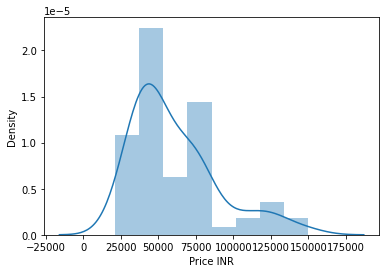

In [ ]:
sns.distplot(vd['Price INR'])

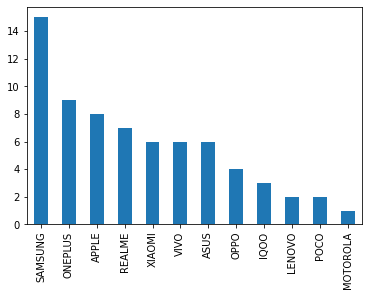

In [ ]:
vd['Brand'].value_counts().plot.bar()


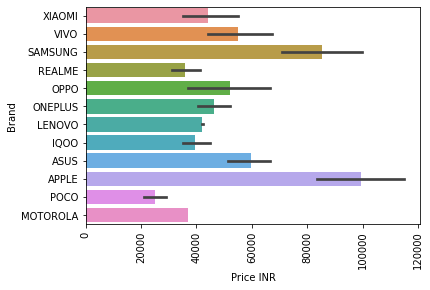

In [ ]:
sns.barplot(y=vd['Brand'],x=vd['Price INR'])
plt.xticks(rotation='vertical')
plt.show()

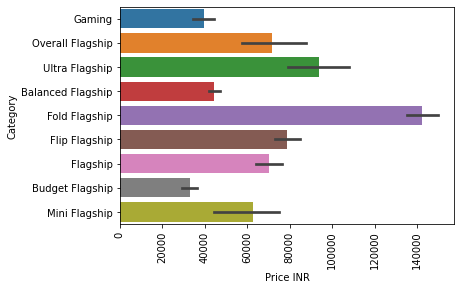

In [ ]:
sns.barplot(y=vd['Category'],x=vd['Price INR'])
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
vd['Brand'].value_counts()

SAMSUNG     15
ONEPLUS      9
APPLE        8
REALME       7
XIAOMI       6
VIVO         6
ASUS         6
OPPO         4
IQOO         3
LENOVO       2
POCO         2
MOTOROLA     1
Name: Brand, dtype: int64

In [ ]:
vd.dtypes

Release Year                    int64
Category                       object
Secondary Display(inch)       float64
Touch Sample Rate(Hz)           int64
Number Cameras                  int64
Front Camera Sensor(MP)         int64
Battery (mAh)                   int64
Wired Charger(w)                int64
Wireless Charging(w)            int64
Weight(gm)                    float64
Security sensor                object
Price INR                       int64
Brand                          object
Model                          object
Screen Size(inch)             float64
Screen Resolution              object
Display Resolution Name        object
Display Type                   object
Display Dimension              object
Refresh Rate(Hz)                int64
Variable Refresh Rate          object
Processor Brand                object
Chipset                        object
Primary Clock Speed(GHz)      float64
Chip Architecture Size(nm)      int64
RAM                             int64
Internal Sto

In [ ]:
vd['Display Type'].value_counts()

AMOLED               13
Dynamic-AMOLED-2X    12
Super-AMOLED         11
Fluid-AMOLED          9
XDR-OLED              8
E4-AMOLED             8
IPS-LCD               3
E5-AMOLED             3
OLED                  2
Name: Display Type, dtype: int64

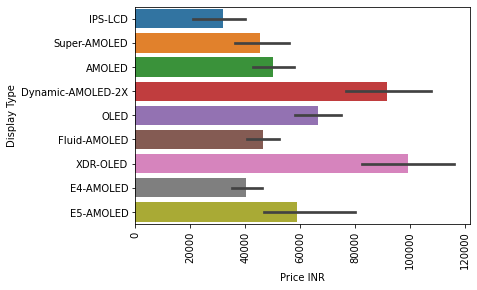

In [ ]:
sns.barplot(y=vd['Display Type'],x=vd['Price INR'])
plt.xticks(rotation='vertical')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


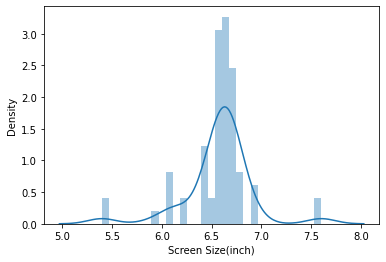

In [ ]:
sns.distplot(vd['Screen Size(inch)'])

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 <a list of 13 Text major ticklabel objects>)

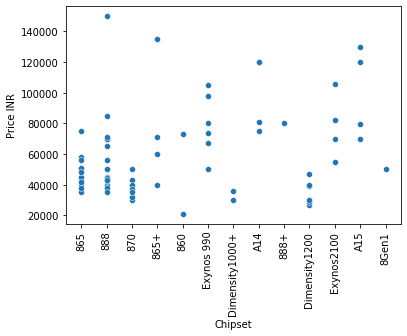

In [ ]:
sns.scatterplot(x=vd['Chipset'],y=vd['Price INR'])
plt.xticks(rotation='vertical')


In [ ]:
vd['Screen Resolution'].value_counts()

1080x2400    33
1080x2340     5
1440x3200     5
1080x2376     4
1170x2532     4
1440x3168     3
1440x3216     2
1180x2400     2
1284x2778     2
1440x3220     2
1080x2636     1
2208x1768     1
1080x2640     1
1768x2208     1
1080x2460     1
1080x2448     1
1440x2400     1
Name: Screen Resolution, dtype: int64

In [ ]:
vd.corr()['Price INR']


Release Year                 -0.187014
Secondary Display(inch)       0.512664
Touch Sample Rate(Hz)        -0.306170
Number Cameras               -0.250739
Front Camera Sensor(MP)      -0.229517
Battery (mAh)                -0.334664
Wired Charger(w)             -0.552173
Wireless Charging(w)          0.412507
Weight(gm)                    0.348731
Price INR                     1.000000
Screen Size(inch)             0.208907
Refresh Rate(Hz)             -0.191111
Primary Clock Speed(GHz)      0.155217
Chip Architecture Size(nm)   -0.300308
RAM                           0.391935
Internal Storage              0.228298
Rear Primary Camera          -0.476563
Rear Secondary Camera         0.207427
Rear Tertiary Camera          0.282909
Rear Quaternary Camera        0.045029
Thickness                    -0.413856
PPI                           0.340955
Name: Price INR, dtype: float64

In [ ]:
vd.drop(columns='Display Resolution Name',inplace=True)
vd.dtypes


Release Year                    int64
Category                       object
Secondary Display(inch)       float64
Touch Sample Rate(Hz)           int64
Number Cameras                  int64
Front Camera Sensor(MP)         int64
Battery (mAh)                   int64
Wired Charger(w)                int64
Wireless Charging(w)            int64
Weight(gm)                    float64
Security sensor                object
Price INR                       int64
Brand                          object
Model                          object
Screen Size(inch)             float64
Screen Resolution              object
Display Type                   object
Display Dimension              object
Refresh Rate(Hz)                int64
Variable Refresh Rate          object
Processor Brand                object
Chipset                        object
Primary Clock Speed(GHz)      float64
Chip Architecture Size(nm)      int64
RAM                             int64
Internal Storage                int64
Rear Primary

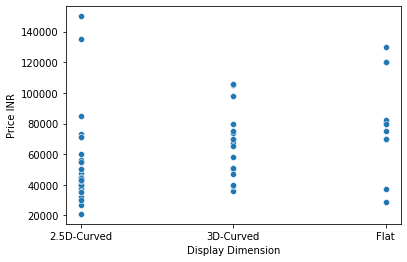

In [ ]:
sns.scatterplot(x=vd['Display Dimension'],y=vd['Price INR'])

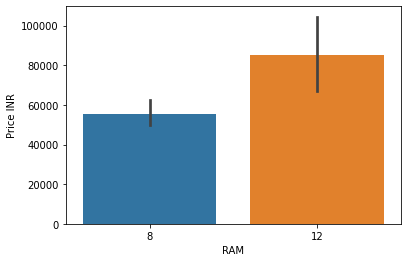

In [ ]:
sns.barplot(x=vd['RAM'],y=vd['Price INR'])

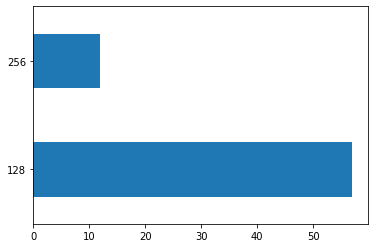

In [ ]:
vd['Internal Storage'].value_counts().plot.barh()

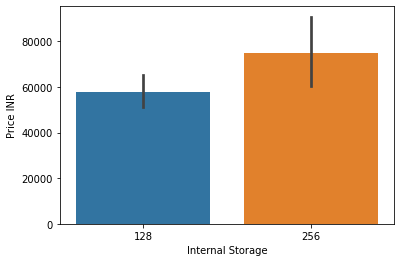

In [ ]:
sns.barplot(x=vd['Internal Storage'],y=vd['Price INR'])

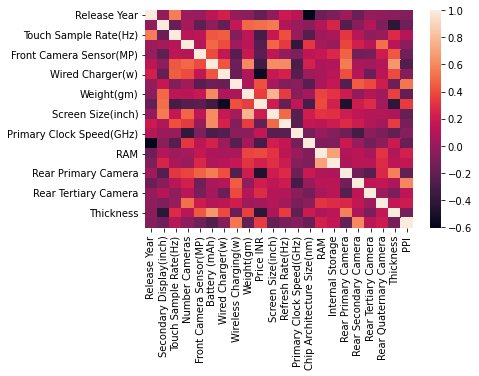

In [ ]:
#vd.drop(columns=['Release Year','Wired Charger(w)','Secondary Display(inch)','Touch Sample Rate(Hz)','Number Cameras','Front Camera Sensor(MP)','Refresh Rate(Hz)','Rear Primary Camera','Rear Quaternary Camera'],inplace=True)
sns.heatmap(vd.corr())


In [ ]:
vd.corr()['Price INR']

Release Year                 -0.187014
Secondary Display(inch)       0.512664
Touch Sample Rate(Hz)        -0.306170
Number Cameras               -0.250739
Front Camera Sensor(MP)      -0.229517
Battery (mAh)                -0.334664
Wired Charger(w)             -0.552173
Wireless Charging(w)          0.412507
Weight(gm)                    0.348731
Price INR                     1.000000
Screen Size(inch)             0.208907
Refresh Rate(Hz)             -0.191111
Primary Clock Speed(GHz)      0.155217
Chip Architecture Size(nm)   -0.300308
RAM                           0.391935
Internal Storage              0.228298
Rear Primary Camera          -0.476563
Rear Secondary Camera         0.207427
Rear Tertiary Camera          0.282909
Rear Quaternary Camera        0.045029
Thickness                    -0.413856
PPI                           0.340955
Name: Price INR, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


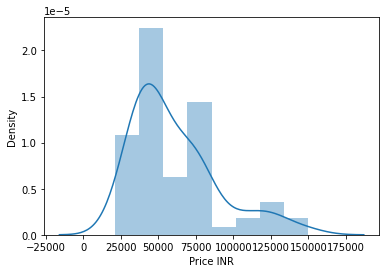

In [ ]:
sns.distplot(vd['Price INR'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


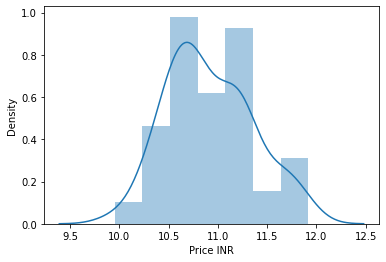

In [ ]:
sns.distplot(np.log(vd['Price INR']))

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

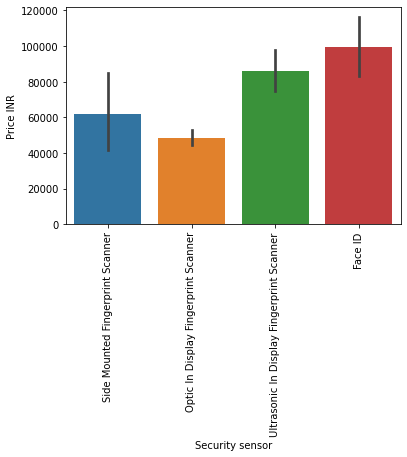

In [ ]:
sns.barplot(x=vd['Security sensor'],y=vd['Price INR'])
plt.xticks(rotation='vertical')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

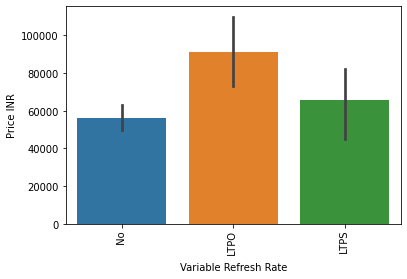

In [ ]:
vd['Variable Refresh Rate']=vd['Variable Refresh Rate'].str.replace('LTPO2.0','LTPO')
sns.barplot(x=vd['Variable Refresh Rate'],y=vd['Price INR'])
plt.xticks(rotation='vertical')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text major ticklabel objects>)

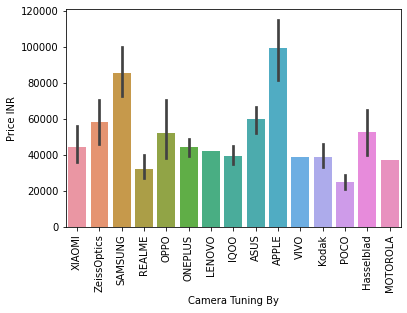

In [ ]:
sns.barplot(x=vd['Camera Tuning By'],y=vd['Price INR'])
plt.xticks(rotation='vertical')

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

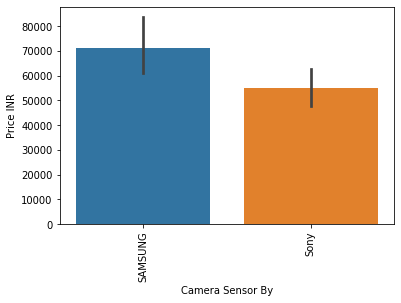

In [ ]:
sns.barplot(x=vd['Camera Sensor By'],y=vd['Price INR'])
plt.xticks(rotation='vertical')

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

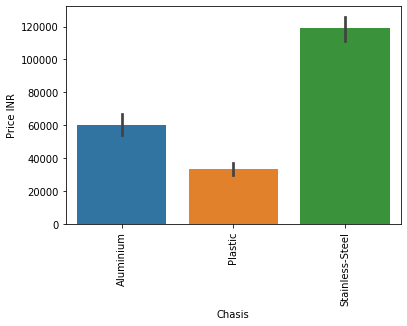

In [ ]:
sns.barplot(x=vd['Chasis'],y=vd['Price INR'])
plt.xticks(rotation='vertical')

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

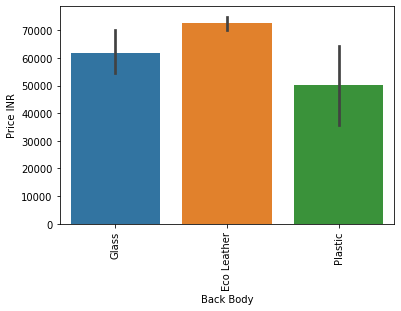

In [ ]:
sns.barplot(x=vd['Back Body'],y=vd['Price INR'])
plt.xticks(rotation='vertical')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text major ticklabel objects>)

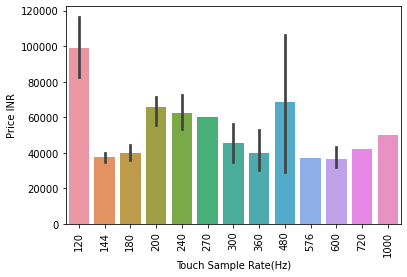

In [ ]:

sns.barplot(x=vd['Touch Sample Rate(Hz)'],y=vd['Price INR'])
plt.xticks(rotation='vertical')

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

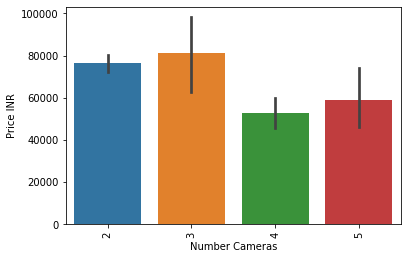

In [ ]:
sns.barplot(x=vd['Number Cameras'],y=vd['Price INR'])
plt.xticks(rotation='vertical')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text major ticklabel objects>)

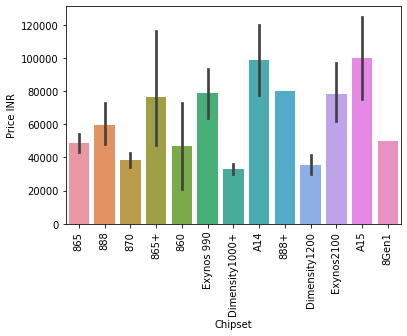

In [ ]:
sns.barplot(x=vd['Chipset'],y=vd['Price INR'])
plt.xticks(rotation='vertical')

In [ ]:
#vd['Back Body']=vd['Back Body'].str.replace('Eco Leather','Glass')
vd['Chipset']=vd['Chipset'].str.replace('865+','865')
vd['Chipset']=vd['Chipset'].str.replace('860','865')
vd['Chipset']=vd['Chipset'].str.replace('870','865')
vd['Chipset']=vd['Chipset'].str.replace('888+','888')
vd['Chipset']=vd['Chipset'].str.replace('8Gen1','888')
vd['Chipset']=vd['Chipset'].str.replace('+','')
vd['Chipset'].value_counts()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  import sys


865              25
888              18
Exynos 990        6
Dimensity1200     6
A14               4
Exynos2100        4
A15               4
Dimensity1000     2
Name: Chipset, dtype: int64

In [ ]:
vd['Chipset']=vd['Chipset'].str.replace('865','865+')
vd['Chipset']=vd['Chipset'].str.replace('888','888+')
vd['Chipset'].value_counts()

865+             25
888+             18
Exynos 990        6
Dimensity1200     6
A14               4
Exynos2100        4
A15               4
Dimensity1000     2
Name: Chipset, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text major ticklabel objects>)

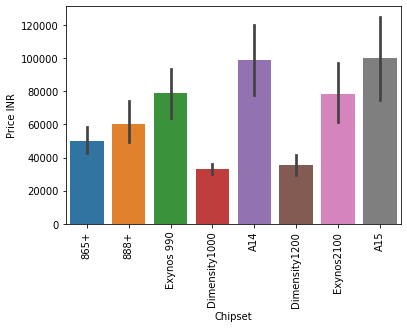

In [ ]:
sns.barplot(x=vd['Chipset'],y=vd['Price INR'])
plt.xticks(rotation='vertical')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text major ticklabel objects>)

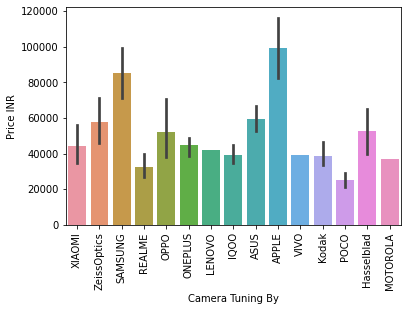

In [ ]:
sns.barplot(x=vd['Camera Tuning By'],y=vd['Price INR'])
plt.xticks(rotation='vertical')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 9 Text major ticklabel objects>)

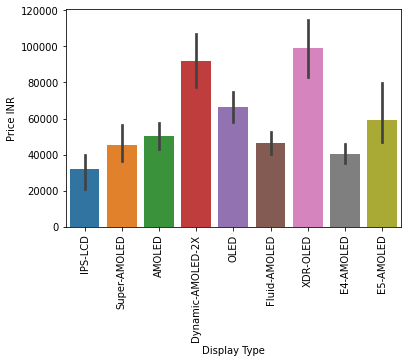

In [ ]:
sns.barplot(x=vd['Display Type'],y=vd['Price INR'])
plt.xticks(rotation='vertical')  


In [ ]:
vd['Display Type']=vd['Display Type'].str.replace('Fluid-AMOLED','Super-AMOLED')
vd['Display Type']=vd['Display Type'].str.replace('Super-AMOLED','AMOLED')
vd['Display Type']=vd['Display Type'].str.replace('XDR-OLED','OLED')
vd['Display Type'].value_counts()

AMOLED               33
Dynamic-AMOLED-2X    12
OLED                 10
E4-AMOLED             8
IPS-LCD               3
E5-AMOLED             3
Name: Display Type, dtype: int64

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

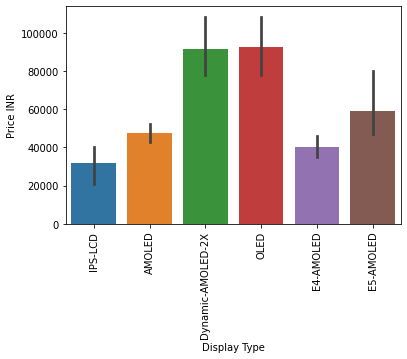

In [ ]:
sns.barplot(x=vd['Display Type'],y=vd['Price INR'])
plt.xticks(rotation='vertical')  

In [ ]:
vd['Back Body'].value_counts()


Glass          60
Plastic         7
Eco Leather     2
Name: Back Body, dtype: int64

In [ ]:

vd['Back Body']=vd['Back Body'].str.replace('Eco Leather','Glass')
vd['Back Body'].value_counts()

Glass      62
Plastic     7
Name: Back Body, dtype: int64

In [ ]:
vd['Brand'].value_counts()

SAMSUNG     15
ONEPLUS      9
APPLE        8
REALME       7
XIAOMI       6
VIVO         6
ASUS         6
OPPO         4
IQOO         3
LENOVO       2
POCO         2
MOTOROLA     1
Name: Brand, dtype: int64

In [ ]:
x = vd.drop(columns=['Price INR','Model','Secondary Display(inch)','Display Dimension','Primary Clock Speed(GHz)',
                     'Front Camera Sensor(MP)','Number Cameras','Screen Resolution','Refresh Rate(Hz)',
                     'Touch Sample Rate(Hz)','Wired Charger(w)',
                     'Rear Primary Camera','Rear Quaternary Camera','Battery (mAh)','Release Year'])
y = np.log(vd['Price INR'])

In [ ]:
x.head()


,Category,Wireless Charging(w),Weight(gm),Security sensor,Brand,Screen Size(inch),Display Type,Variable Refresh Rate,Processor Brand,Chipset,Chip Architecture Size(nm),RAM,Internal Storage,Rear Secondary Camera,Rear Tertiary Camera,Camera Sensor By,Camera Tuning By,Back Body,Chasis,Thickness,PPI
0,Gaming,0,218.0,Side Mounted Fingerprint Scanner,XIAOMI,6.67,IPS-LCD,No,Snapdragon,865+,7,8,128,13,5,SAMSUNG,XIAOMI,Glass,Aluminium,9.3,394.573533
1,Gaming,0,216.0,Side Mounted Fingerprint Scanner,XIAOMI,6.67,IPS-LCD,No,Snapdragon,865+,7,8,128,13,5,Sony,XIAOMI,Glass,Aluminium,9.3,394.573533
2,Overall Flagship,30,208.0,Optic In Display Fingerprint Scanner,XIAOMI,6.67,AMOLED,No,Snapdragon,865+,7,8,128,13,2,Sony,XIAOMI,Glass,Aluminium,9.0,386.387975
3,Ultra Flagship,0,191.0,Optic In Display Fingerprint Scanner,VIVO,6.56,AMOLED,No,Snapdragon,888+,5,12,256,48,12,SAMSUNG,ZeissOptics,Glass,Aluminium,9.1,397.856392
4,Overall Flagship,0,179.0,Optic In Display Fingerprint Scanner,VIVO,6.56,AMOLED,No,Snapdragon,865+,7,12,256,13,13,Sony,ZeissOptics,Glass,Aluminium,7.6,397.856392


In [ ]:
y

0     10.596610
1     10.463075
2     10.819758
3     11.156108
4     10.819578
        ...    
64    11.288531
65    10.915070
66    10.819758
67    10.463075
68    10.668932
Name: Price INR, Length: 69, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
x['Brand'].value_counts()

SAMSUNG     15
ONEPLUS      9
APPLE        8
REALME       7
XIAOMI       6
VIVO         6
ASUS         6
OPPO         4
IQOO         3
LENOVO       2
POCO         2
MOTOROLA     1
Name: Brand, dtype: int64

In [ ]:
x.dtypes 

Category                       object
Wireless Charging(w)            int64
Weight(gm)                    float64
Security sensor                object
Brand                          object
Screen Size(inch)             float64
Display Type                   object
Variable Refresh Rate          object
Processor Brand                object
Chipset                        object
Chip Architecture Size(nm)      int64
RAM                             int64
Internal Storage                int64
Rear Secondary Camera           int64
Rear Tertiary Camera            int64
Camera Sensor By               object
Camera Tuning By               object
Back Body                      object
Chasis                         object
Thickness                     float64
PPI                           float64
dtype: object

In [ ]:
x['Variable Refresh Rate'].value_counts()

 No      58
 LTPO     8
 LTPS     3
Name: Variable Refresh Rate, dtype: int64

In [ ]:
x.head(1)

,Category,Wireless Charging(w),Weight(gm),Security sensor,Brand,Screen Size(inch),Display Type,Variable Refresh Rate,Processor Brand,Chipset,Chip Architecture Size(nm),RAM,Internal Storage,Rear Secondary Camera,Rear Tertiary Camera,Camera Sensor By,Camera Tuning By,Back Body,Chasis,Thickness,PPI
0,Gaming,0,218.0,Side Mounted Fingerprint Scanner,XIAOMI,6.67,IPS-LCD,No,Snapdragon,865+,7,8,128,13,5,SAMSUNG,XIAOMI,Glass,Aluminium,9.3,394.573533


In [ ]:
step1 = ColumnTransformer(transformers=[
    ('col_trf',OneHotEncoder(sparse=False,drop='first'),[0,3,4,6,7,8,9,15,16,17,18])
],remainder='passthrough')

step2 = RandomForestRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.7233357552872077
MAE 0.17611061209187515


In [ ]:
#from sklearn.ensemble import GradientBoostingRegressor,ExtraTreesRegressor
#from sklearn.ensemble import VotingRegressor,StackingRegressor
#from xgboost import XGBRegressor

#step1 = ColumnTransformer(transformers=[
#    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,3,4,6,7,8,9,15,16,17,18]) 
#],remainder='passthrough')


#rf = RandomForestRegressor(n_estimators=350,random_state=3,max_samples=None,max_features=0.75,max_depth=15)
#gbdt = GradientBoostingRegressor(n_estimators=100,max_features=0.5)
#xgb = XGBRegressor(n_estimators=25,learning_rate=0.3,max_depth=5)
#et = ExtraTreesRegressor(n_estimators=100,random_state=3,max_samples=None,max_features=0.75,max_depth=10)

#step2 = VotingRegressor([('rf', rf), ('gbdt', gbdt), ('xgb',xgb), ('et',et)],weights=[5,1,1,1])

#pipe = Pipeline([
 #   ('step1',step1),
  #  ('step2',step2)
#])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

[10:07:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
R2 score 0.7827897669246288
MAE 0.15940538734810034


In [ ]:
import pickle

pickle.dump(vd,open('vd.pkl','wb'))
pickle.dump(pipe,open('pipe.pkl','wb'))

In [ ]:
vd

,Release Year,Category,Secondary Display(inch),Touch Sample Rate(Hz),Number Cameras,Front Camera Sensor(MP),Battery (mAh),Wired Charger(w),Wireless Charging(w),Weight(gm),Security sensor,Price INR,Brand,Model,Screen Size(inch),Screen Resolution,Display Type,Display Dimension,Refresh Rate(Hz),Variable Refresh Rate,Processor Brand,Chipset,Primary Clock Speed(GHz),Chip Architecture Size(nm),RAM,Internal Storage,Rear Primary Camera,Rear Secondary Camera,Rear Tertiary Camera,Rear Quaternary Camera,Camera Sensor By,Camera Tuning By,Back Body,Chasis,Thickness,PPI
0,2020,Gaming,0.0,144,4,20,5000,33,0,218.0,Side Mounted Fingerprint Scanner,39999,XIAOMI,Mi 10T PRO,6.67,1080x2400,IPS-LCD,2.5D-Curved,144,No,Snapdragon,865+,2.84,7,8,128,108,13,5,0,SAMSUNG,XIAOMI,Glass,Aluminium,9.30,394.573533
1,2020,Gaming,0.0,144,4,20,5000,33,0,216.0,Side Mounted Fingerprint Scanner,34999,XIAOMI,Mi 10T,6.67,1080x2400,IPS-LCD,2.5D-Curved,144,No,Snapdragon,865+,2.84,7,8,128,64,13,5,0,Sony,XIAOMI,Glass,Aluminium,9.30,394.573533
2,2020,Overall Flagship,0.0,180,5,20,4780,30,30,208.0,Optic In Display Fingerprint Scanner,49999,XIAOMI,Mi 10,6.67,1080x2340,AMOLED,3D-Curved,90,No,Snapdragon,865+,2.84,7,8,128,108,13,2,2,Sony,XIAOMI,Glass,Aluminium,9.00,386.387975
3,2020,Ultra Flagship,0.0,240,5,32,4200,55,0,191.0,Optic In Display Fingerprint Scanner,69990,VIVO,X60 PRO PLUS,6.56,1080x2376,AMOLED,3D-Curved,120,No,Snapdragon,888+,2.84,5,12,256,50,48,12,8,SAMSUNG,ZeissOptics,Glass,Aluminium,9.10,397.856392
4,2020,Overall Flagship,0.0,240,4,32,4200,33,0,179.0,Optic In Display Fingerprint Scanner,49990,VIVO,X60 PRO,6.56,1080x2376,AMOLED,3D-Curved,120,No,Snapdragon,865+,3.20,7,12,256,48,13,13,0,Sony,ZeissOptics,Glass,Aluminium,7.60,397.856392
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,2021,Flagship,0.0,120,2,12,3227,20,15,174.0,Face ID,79900,APPLE,13,6.10,1170x2532,OLED,Flat,60,No,APPLE,A15,3.26,5,8,128,12,12,0,0,Sony,APPLE,Glass,Aluminium,7.65,457.254346
65,2022,Balanced Flagship,0.0,240,4,32,4500,25,15,177.0,Optic In Display Fingerprint Scanner,54999,SAMSUNG,S 21 FE,6.40,1080x2400,Dynamic-AMOLED-2X,2.5D-Curved,120,No,SAMSUNG,Exynos2100,2.90,5,8,128,12,12,8,0,SAMSUNG,SAMSUNG,Plastic,Aluminium,7.90,411.219604
66,2022,Overall Flagship,0.0,1000,4,32,5000,65,0,199.0,Optic In Display Fingerprint Scanner,49999,REALME,GT 2 PRO,6.67,1440x3216,E5-AMOLED,2.5D-Curved,120,LTPO,Snapdragon,888+,3.00,4,8,128,50,50,2,0,Sony,Kodak,Glass,Aluminium,8.20,528.286479
67,2022,Gaming,0.0,600,4,16,5000,65,0,199.8,Optic In Display Fingerprint Scanner,34999,REALME,GT 2,6.62,1440x2400,E4-AMOLED,2.5D-Curved,120,No,Snapdragon,888+,2.84,5,8,128,50,8,2,0,Sony,Kodak,Glass,Aluminium,8.60,422.788053


In [ ]:
x_train

,Category,Wireless Charging(w),Weight(gm),Security sensor,Brand,Screen Size(inch),Display Type,Variable Refresh Rate,Processor Brand,Chipset,Chip Architecture Size(nm),RAM,Internal Storage,Rear Secondary Camera,Rear Tertiary Camera,Camera Sensor By,Camera Tuning By,Back Body,Chasis,Thickness,PPI
59,Mini Flagship,0,169.0,Optic In Display Fingerprint Scanner,ASUS,5.90,E4-AMOLED,No,Snapdragon,888+,5,8,128,12,0,Sony,ASUS,Glass,Aluminium,8.90,446.068723
58,Flagship,0,230.0,Optic In Display Fingerprint Scanner,ASUS,6.67,AMOLED,No,Snapdragon,888+,5,8,128,12,8,Sony,ASUS,Glass,Aluminium,9.60,394.573533
55,Gaming,0,259.0,Optic In Display Fingerprint Scanner,LENOVO,6.92,E4-AMOLED,No,Snapdragon,888+,5,12,256,16,0,SAMSUNG,LENOVO,Glass,Aluminium,9.90,388.241847
27,Overall Flagship,15,189.0,Face ID,APPLE,6.10,OLED,No,APPLE,A14,5,8,128,12,12,Sony,APPLE,Glass,Stainless-Steel,7.40,457.254346
68,Gaming,0,198.5,Optic In Display Fingerprint Scanner,ONEPLUS,6.56,AMOLED,No,Snapdragon,888+,5,8,128,16,2,Sony,ONEPLUS,Glass,Aluminium,8.30,401.189857
66,Overall Flagship,0,199.0,Optic In Display Fingerprint Scanner,REALME,6.67,E5-AMOLED,LTPO,Snapdragon,888+,4,8,128,50,2,Sony,Kodak,Glass,Aluminium,8.20,528.286479
9,Overall Flagship,15,186.0,Ultrasonic In Display Fingerprint Scanner,SAMSUNG,6.70,Dynamic-AMOLED-2X,No,SAMSUNG,Exynos 990,7,8,128,64,12,SAMSUNG,SAMSUNG,Glass,Aluminium,7.80,523.742381
28,Mini Flagship,12,133.0,Face ID,APPLE,5.40,OLED,No,APPLE,A14,5,8,128,12,0,Sony,APPLE,Glass,Aluminium,7.40,477.260702
13,Flagship,15,192.0,Optic In Display Fingerprint Scanner,SAMSUNG,6.70,AMOLED,No,SAMSUNG,Exynos 990,7,8,128,64,12,SAMSUNG,SAMSUNG,Plastic,Aluminium,8.30,392.806786
35,Budget Flagship,0,171.0,Optic In Display Fingerprint Scanner,VIVO,6.56,AMOLED,No,MediaTek,Dimensity1200,6,8,128,8,2,SAMSUNG,VIVO,Glass,Aluminium,7.40,401.189857


In [ ]:
x_train['Back Body'].value_counts()

Glass      50
Plastic     5
Name: Back Body, dtype: int64

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor,ExtraTreesRegressor
from sklearn.ensemble import VotingRegressor,StackingRegressor
#from xgboost import XGBRegressor

step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,3,4,6,7,8,9,15,16,17,18]) 
],remainder='passthrough')


rf = RandomForestRegressor(n_estimators=350,random_state=3,max_samples=None,max_features=0.75,max_depth=15)
gbdt = GradientBoostingRegressor(n_estimators=100,max_features=0.5)
#xgb = XGBRegressor(n_estimators=25,learning_rate=0.3,max_depth=5)
et = ExtraTreesRegressor(n_estimators=100,random_state=3,max_samples=None,max_features=0.75,max_depth=10)

#step2 = VotingRegressor([('rf', rf), ('gbdt', gbdt), ('xgb',xgb), ('et',et)],weights=[5,1,1,1])
step2 = VotingRegressor([('rf', rf), ('gbdt', gbdt),('et',et)],weights=[5,1,1])

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.7747625411747743
MAE 0.16280962658956025


In [ ]:
import pickle

pickle.dump(vd,open('vd.pkl','wb'))
pickle.dump(pipe,open('pipe.pkl','wb'))